<span style="font-size:27px; color:blue">**Airline Passenger Satisfaction Analysis**</span>

## Import Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
 
pd.set_option('display.max_columns', None)

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score)
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tabulate import tabulate

## Exploratory Data Analysis

### Read Dataset

In [3]:
# Load the dataset
file_path = r"C:\Users\Zuu Zuu Kyaw Shwe\Desktop\Data Mining and Machine Learning\Project\Airline Passenger Satisfaction\satisfaction.csv"
df = pd.read_csv(file_path)

In [5]:
# Show the dataframe dimension
df.shape

(129880, 24)

In [7]:
# Show the first few rows of the DataFrame
df.head()

id satisfaction_v2  Gender   Customer Type  Age   Type of Travel  \
0   11112       satisfied  Female  Loyal Customer   65  Personal Travel   
1  110278       satisfied    Male  Loyal Customer   47  Personal Travel   
2  103199       satisfied  Female  Loyal Customer   15  Personal Travel   
3   47462       satisfied  Female  Loyal Customer   60  Personal Travel   
4  120011       satisfied  Female  Loyal Customer   70  Personal Travel   

      Class  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0       Eco              265             0                                  0   
1  Business             2464             0                                  0   
2       Eco             2138             0                                  0   
3       Eco              623             0                                  0   
4       Eco              354             0                                  0   

   Food and drink  Gate location  Inflight wifi service  \
0               0              2                      2   
1               0              3                      0   
2               0              3                      2   
3               0              3                      3   
4               0              3                      4   

   Inflight entertainment  Online support  Ease of Online booking  \
0                       4               2                       3   
1                       2               2                       3   
2                       0               2                       2   
3                       4               3                       1   
4                       3               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0

In [9]:
# Display dataset's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [11]:
# Show statistical summary for categorical columns
df.describe(include='O')

satisfaction_v2  Gender   Customer Type   Type of Travel     Class
count           129880  129880          129880           129880    129880
unique               2       2               2                2         3
top          satisfied  Female  Loyal Customer  Business travel  Business
freq             71087   65899          106100            89693     62160

In [13]:
# Show statistical summary for numerical columns
df.describe().T

count          mean           std   min  \
id                                 129880.0  64940.500000  37493.270818   1.0   
Age                                129880.0     39.427957     15.119360   7.0   
Flight Distance                    129880.0   1981.409055   1027.115606  50.0   
Seat comfort                       129880.0      2.838597      1.392983   0.0   
Departure/Arrival time convenient  129880.0      2.990645      1.527224   0.0   
Food and drink                     129880.0      2.851994      1.443729   0.0   
Gate location                      129880.0      2.990422      1.305970   0.0   
Inflight wifi service              129880.0      3.249130      1.318818   0.0   
Inflight entertainment             129880.0      3.383477      1.346059   0.0   
Online support                     129880.0      3.519703      1.306511   0.0   
Ease of Online booking             129880.0      3.472105      1.305560   0.0   
On-board service                   129880.0      3.465075      1.270836   0.0   
Leg room service                   129880.0      3.485902      1.292226   0.0   
Baggage handling                   129880.0      3.695673      1.156483   1.0   
Checkin service                    129880.0      3.340807      1.260582   0.0   
Cleanliness                        129880.0      3.705759      1.151774   0.0   
Online boarding                    129880.0      3.352587      1.298715   0.0   
Departure Delay in Minutes         129880.0     14.713713     38.071126   0.0   
Arrival Delay in Minutes           129487.0     15.091129     38.465650   0.0   

                                        25%      50%       75%       max  
id                                 32470.75  64940.5  97410.25  129880.0  
Age                                   27.00     40.0     51.00      85.0  
Flight Distance                     1359.00   1925.0   2544.00    6951.0  
Seat comfort                           2.00      3.0      4.00       5.0  
Departure/Arrival time convenient      2.00      3.0      4.00       5.0  
Food and drink                         2.00      3.0      4.00       5.0  
Gate location                          2.00      3.0      4.00       5.0  
Inflight wifi service                  2.00      3.0      4.00       5.0  
Inflight entertainment                 2.00      4.0      4.00       5.0  
Online support                         3.00      4.0      5.00       5.0  
Ease of Online booking                 2.00      4.0      5.00       5.0  
On-board service                       3.00      4.0      4.00       5.0  
Leg room service                       2.00      4.0      5.00       5.0  
Baggage handling                       3.00      4.0      5.00       5.0  
Checkin service                        3.00      3.0      4.00       5.0  
Cleanliness                            3.00      4.0      5.00       5.0  
Online boarding                        2.00      4.0      4.00       5.0  
Departure Delay in Minutes             0.00      0.0     12.00    1592.0  
Arrival Delay in Minutes               0.00      0.0     13.00    1584.0

### Data Cleaning

In [15]:
# Drop [id] column because it's not necessary
df.drop(['id'], axis=1, inplace=True)

In [17]:
# Rename the columns title to improve consistency
df = df.rename(columns={'satisfaction_v2':'Satisfaction', 'Customer Type':'Customer_Type',
                        'Type of Travel':'Travel_Type', 'Flight Distance':'Flight_Distance',
                        'Seat comfort':'Seat_Comfort', 'Departure/Arrival time convenient':'Dep_Arr_Time_Convenient',
                        'Food and drink':'Food_Drink', 'Gate location':'Gate_Location','Inflight wifi service':'Wifi_Service',
                        'Inflight entertainment':'Entertainment','Online support':'Online_Support',
                        'Ease of Online booking':'Online_Booking_Service','On-board service':'Onboard_Service',
                        'Leg room service':'Leg_Room_Service','Baggage handling':'Baggage_Handling',
                        'Checkin service':'Checkin_Service','Online boarding':'Online_Boarding',
                        'Departure Delay in Minutes':'Departure_Delay_Minutes','Arrival Delay in Minutes':'Arrival_Delay_Minutes'})
df.columns

Index(['Satisfaction', 'Gender', 'Customer_Type', 'Age', 'Travel_Type',
       'Class', 'Flight_Distance', 'Seat_Comfort', 'Dep_Arr_Time_Convenient',
       'Food_Drink', 'Gate_Location', 'Wifi_Service', 'Entertainment',
       'Online_Support', 'Online_Booking_Service', 'Onboard_Service',
       'Leg_Room_Service', 'Baggage_Handling', 'Checkin_Service',
       'Cleanliness', 'Online_Boarding', 'Departure_Delay_Minutes',
       'Arrival_Delay_Minutes'],
      dtype='object')

In [19]:
# Separate columns into numerical and categorical for better analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [21]:
# Check for inconsistencies or unusual values in categorical columns
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'Satisfaction': ['satisfied' 'neutral or dissatisfied']
Unique values in column 'Gender': ['Female' 'Male']
Unique values in column 'Customer_Type': ['Loyal Customer' 'disloyal Customer']
Unique values in column 'Travel_Type': ['Personal Travel' 'Business travel']
Unique values in column 'Class': ['Eco' 'Business' 'Eco Plus']


In [23]:
# Handle inconsistent data for categorical columns (e.g., capitalization issues, typos)
df['Satisfaction'] = df['Satisfaction'].str.strip().str.title()
df['Customer_Type'] = df['Customer_Type'].str.strip().str.title()
df['Travel_Type'] = df['Travel_Type'].str.strip().str.title()

In [24]:
# The satisfaction feature is the target. Move the "Satisfaction" column to the end of the DataFrame.
satisfaction_column = df.pop('Satisfaction')
df['Satisfaction'] = satisfaction_column

In [27]:
# Check for any negative values or invalid data in numerical columns
invalid_numerical_data = {}
for col in numerical_columns:
    invalid_data = df[df[col] < 0]
    if not invalid_data.empty:
        invalid_numerical_data[col] = len(invalid_data)

invalid_numerical_data

{}

In [29]:
# Check for duplicates in the dataset
df.duplicated().sum()

0

In [30]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

Gender                       0
Customer_Type                0
Age                          0
Travel_Type                  0
Class                        0
Flight_Distance              0
Seat_Comfort                 0
Dep_Arr_Time_Convenient      0
Food_Drink                   0
Gate_Location                0
Wifi_Service                 0
Entertainment                0
Online_Support               0
Online_Booking_Service       0
Onboard_Service              0
Leg_Room_Service             0
Baggage_Handling             0
Checkin_Service              0
Cleanliness                  0
Online_Boarding              0
Departure_Delay_Minutes      0
Arrival_Delay_Minutes      393
Satisfaction                 0
dtype: int64

In [33]:
# Handle Missing Values
df['Arrival_Delay_Minutes'].fillna(df['Arrival_Delay_Minutes'].median(), inplace=True)

### Data Visualization

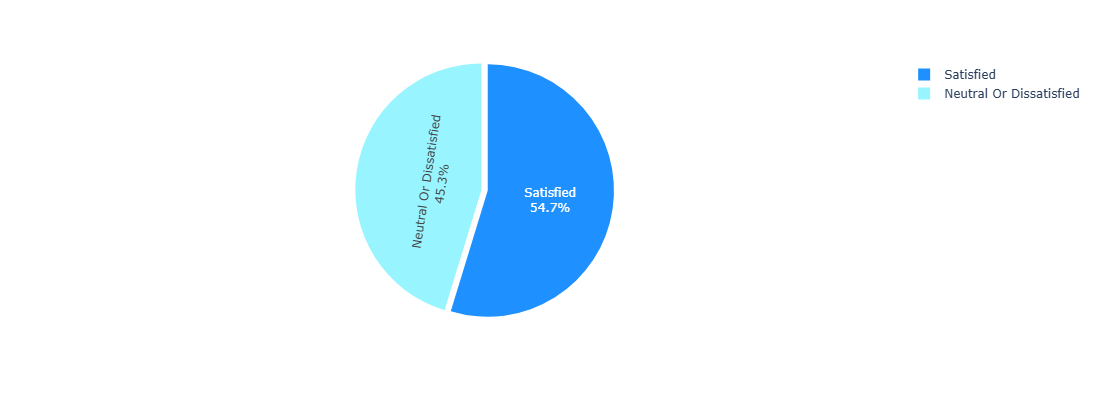

In [35]:
# Examine whether the dependent variable is evenly distributed
Satisfaction_counts = df['Satisfaction'].value_counts()
sky_colors = ['#1E90FF', '#98F5FF']
fig = px.pie(
    values=Satisfaction_counts.values,
    names=Satisfaction_counts.index,
    color_discrete_sequence=sky_colors
)
fig.update_traces(textinfo='percent+label', pull=[0.03, 0.02], textfont=dict(size=12))
fig.update_layout(
    showlegend=True,
    title_font=dict(size=16),
    width=600,  
    height=400 
)
fig.show()

In [37]:
sample_data = df.sample(1000, random_state=42)

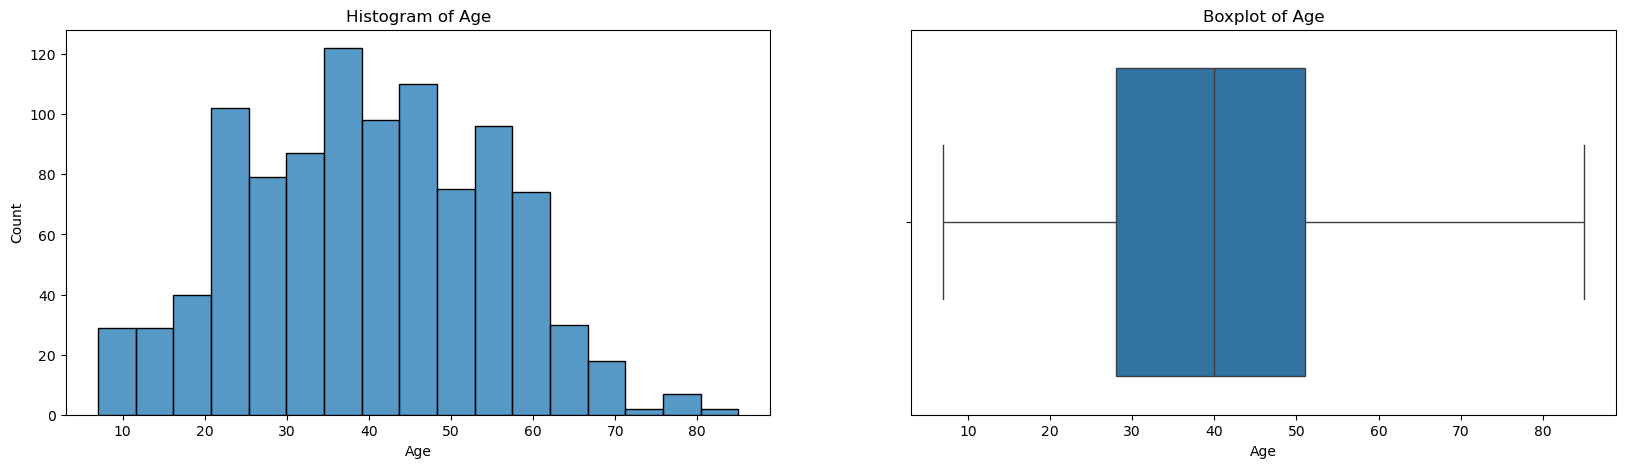

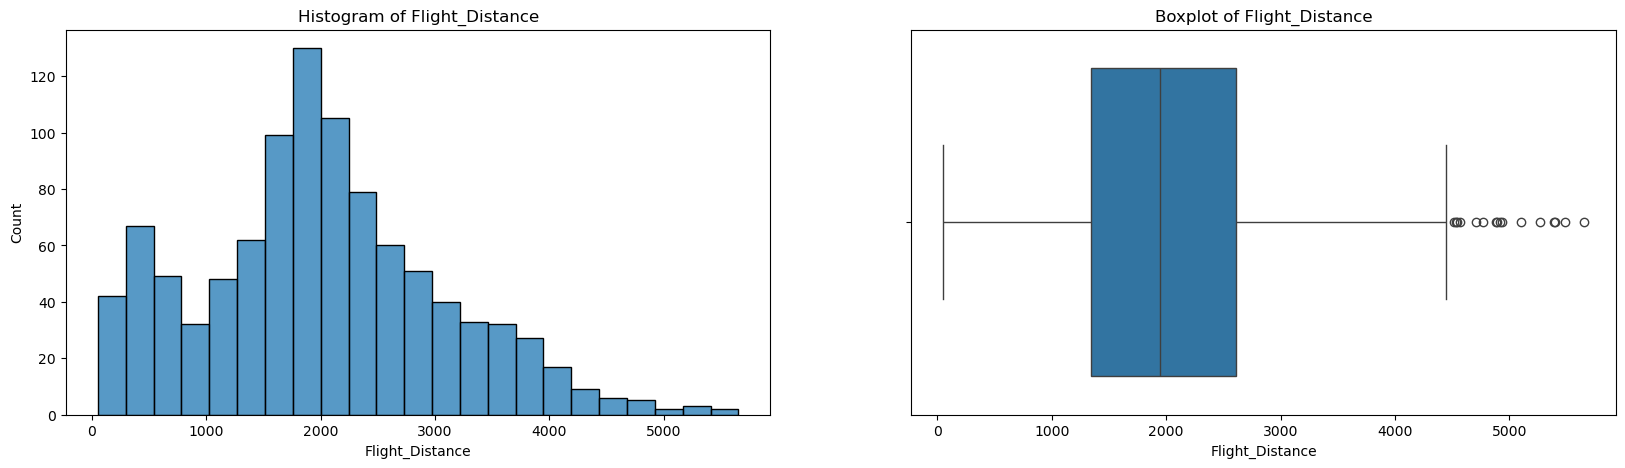

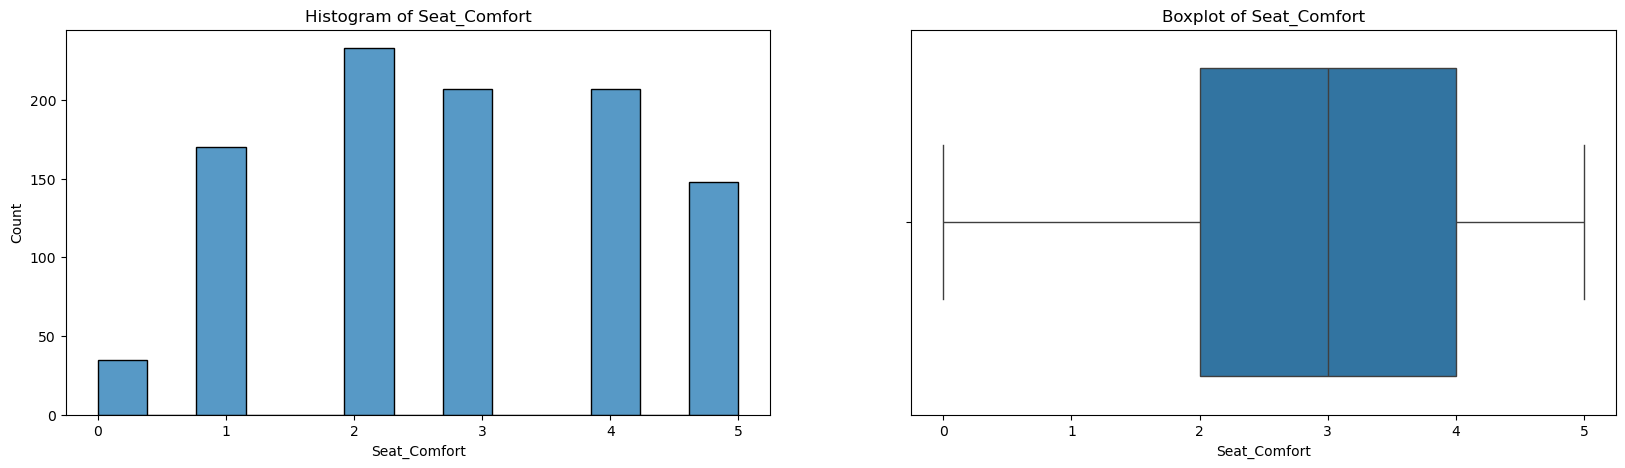

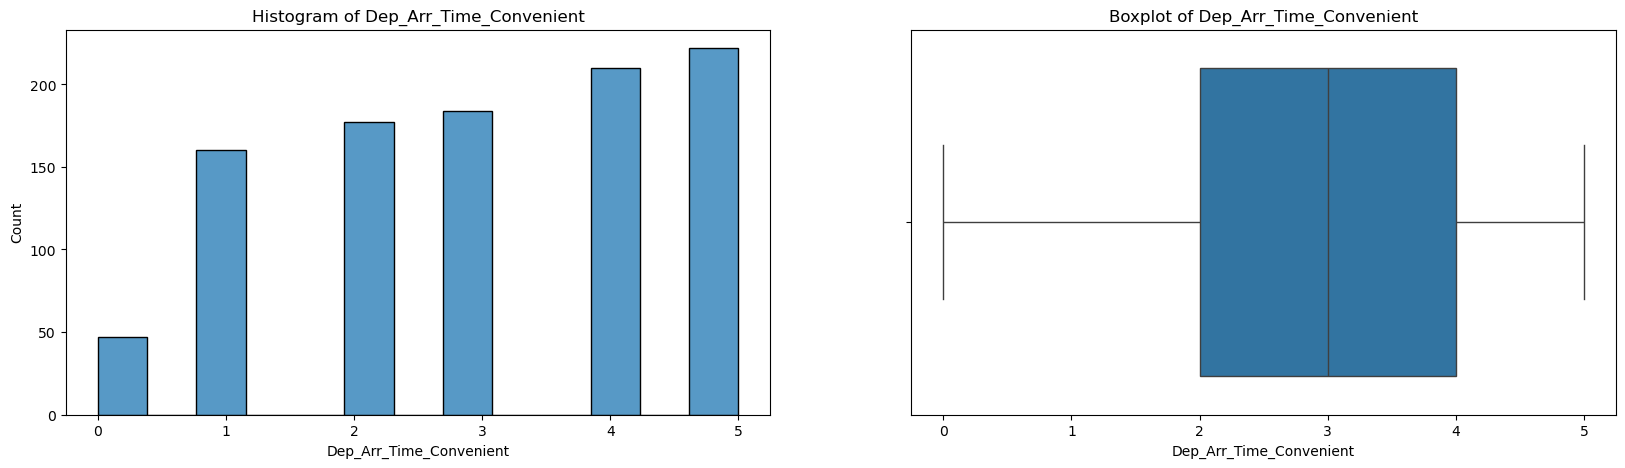

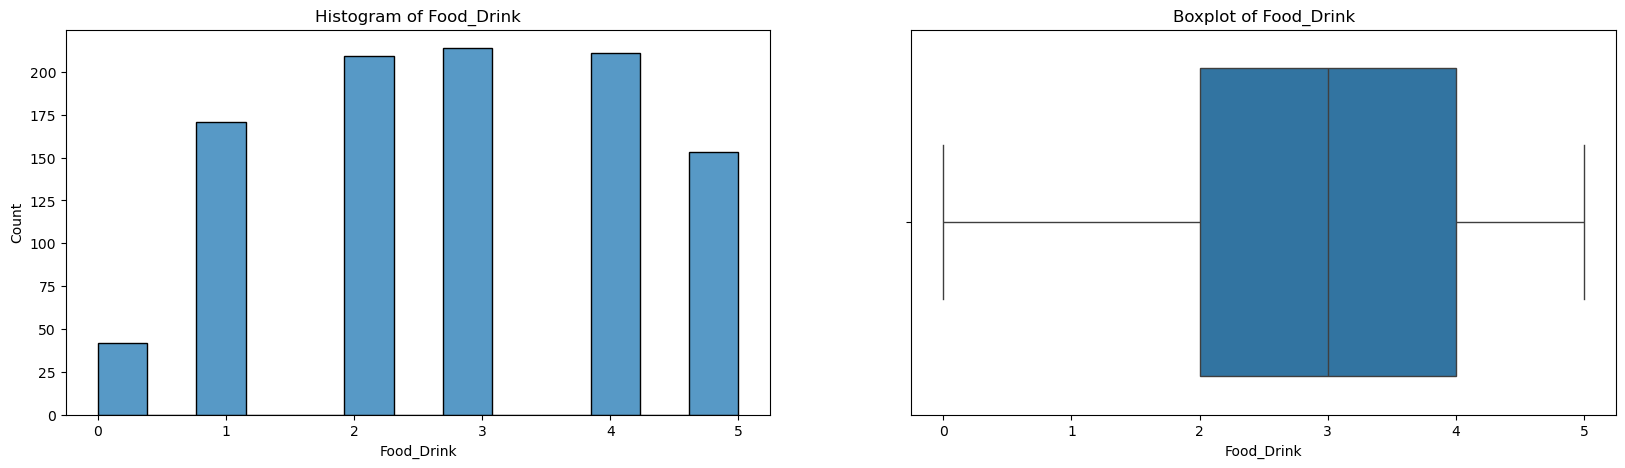

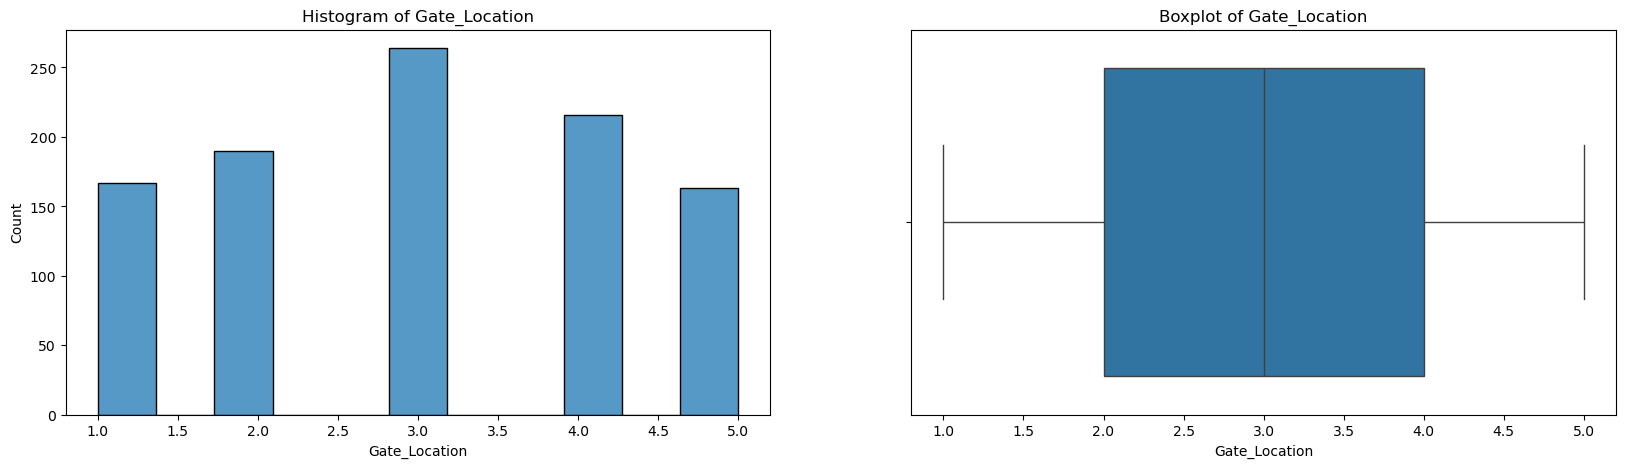

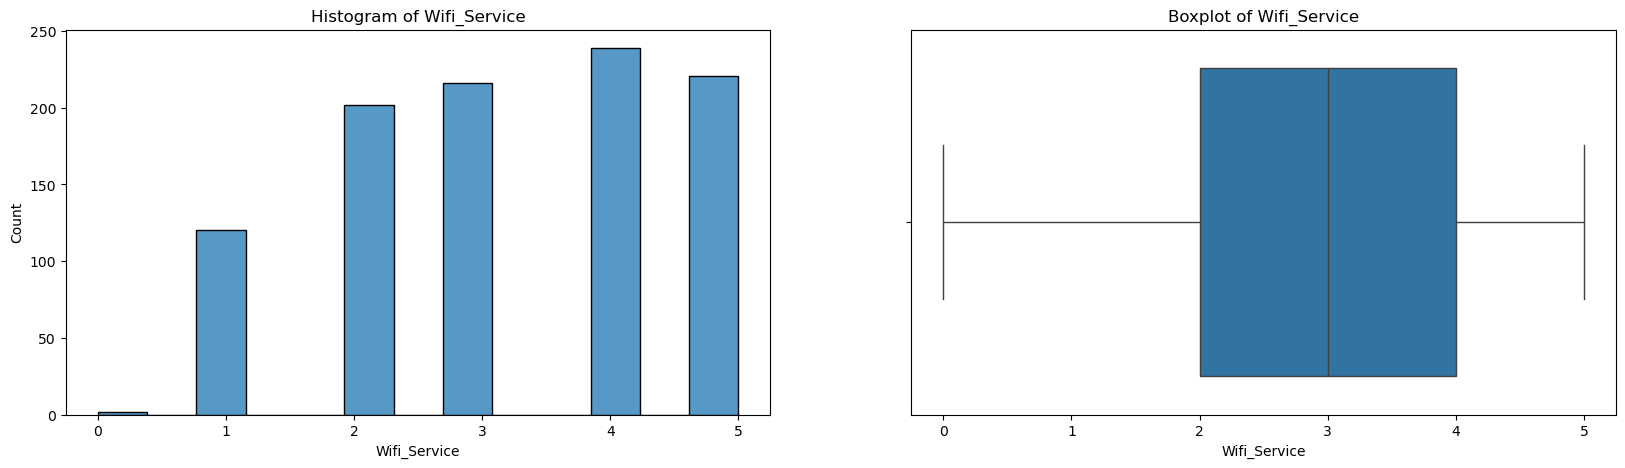

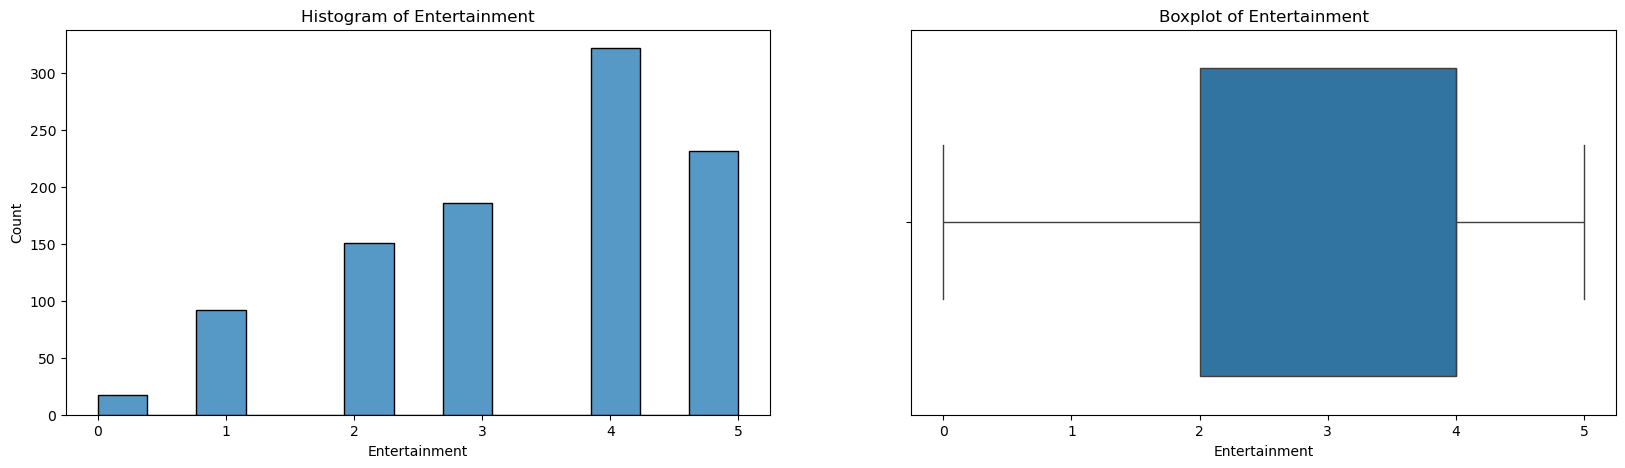

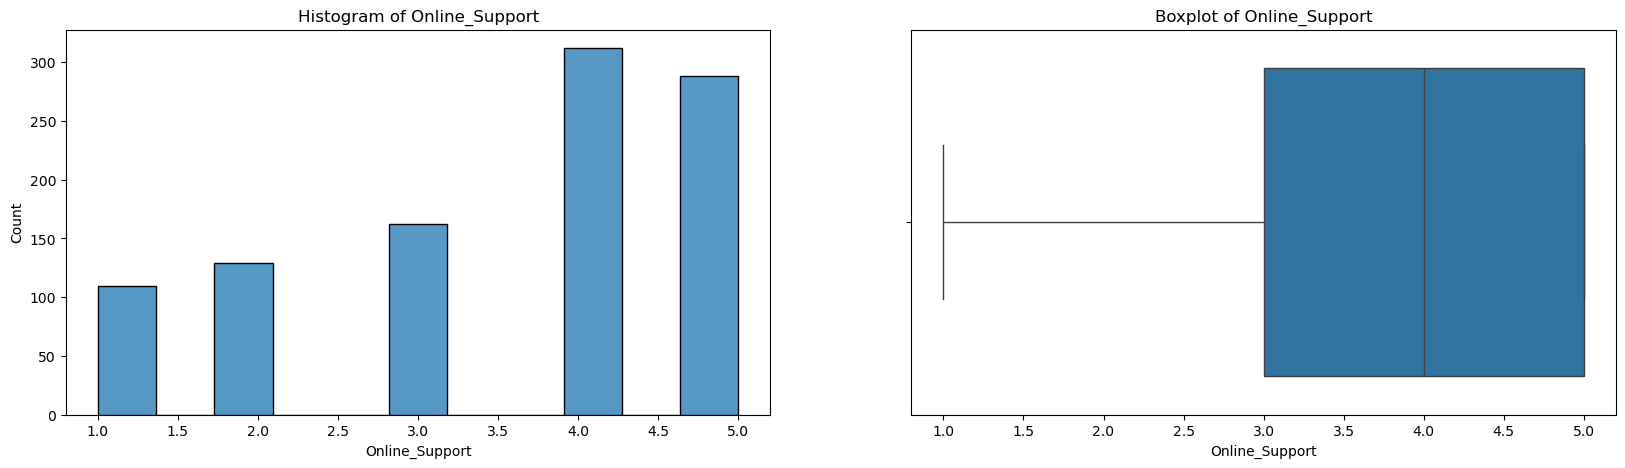

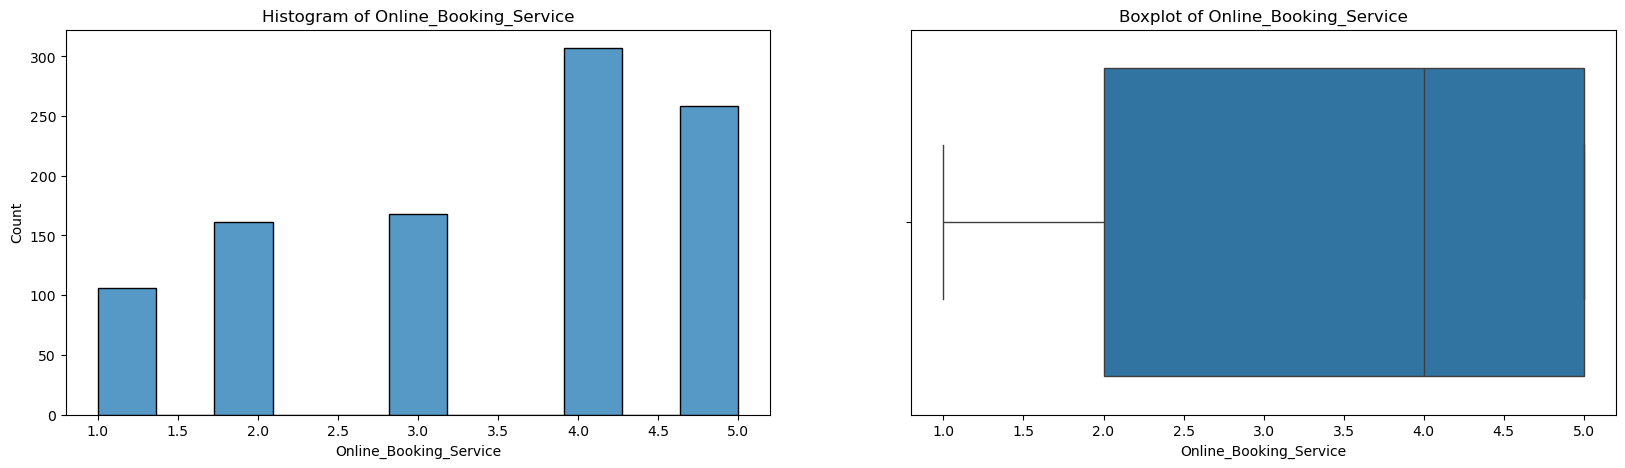

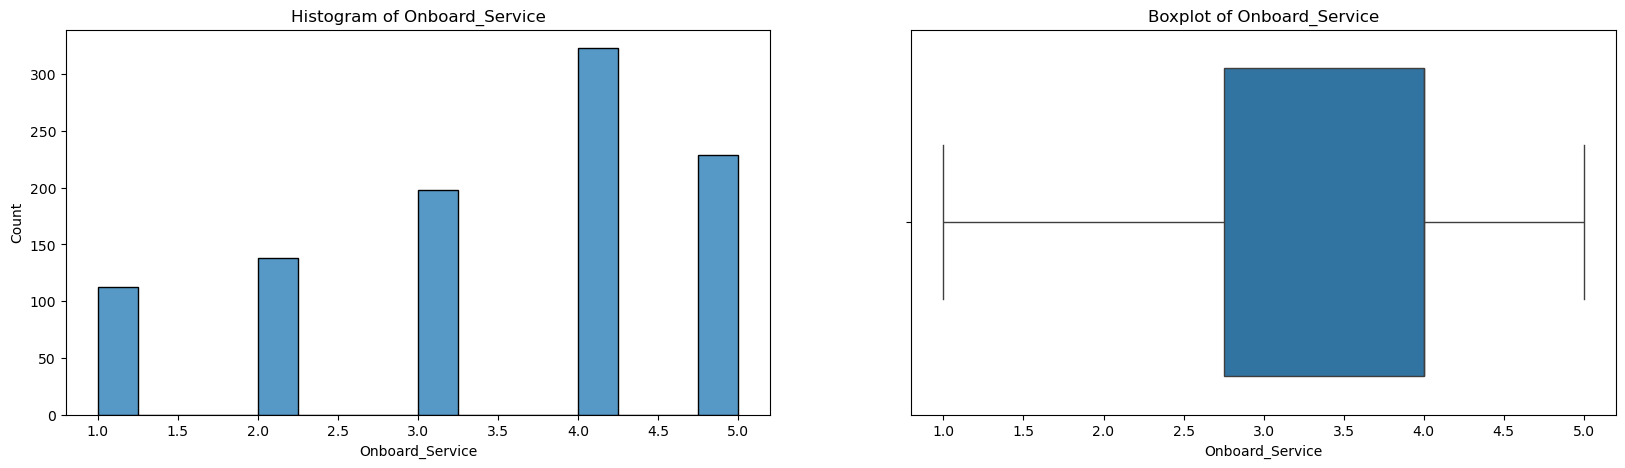

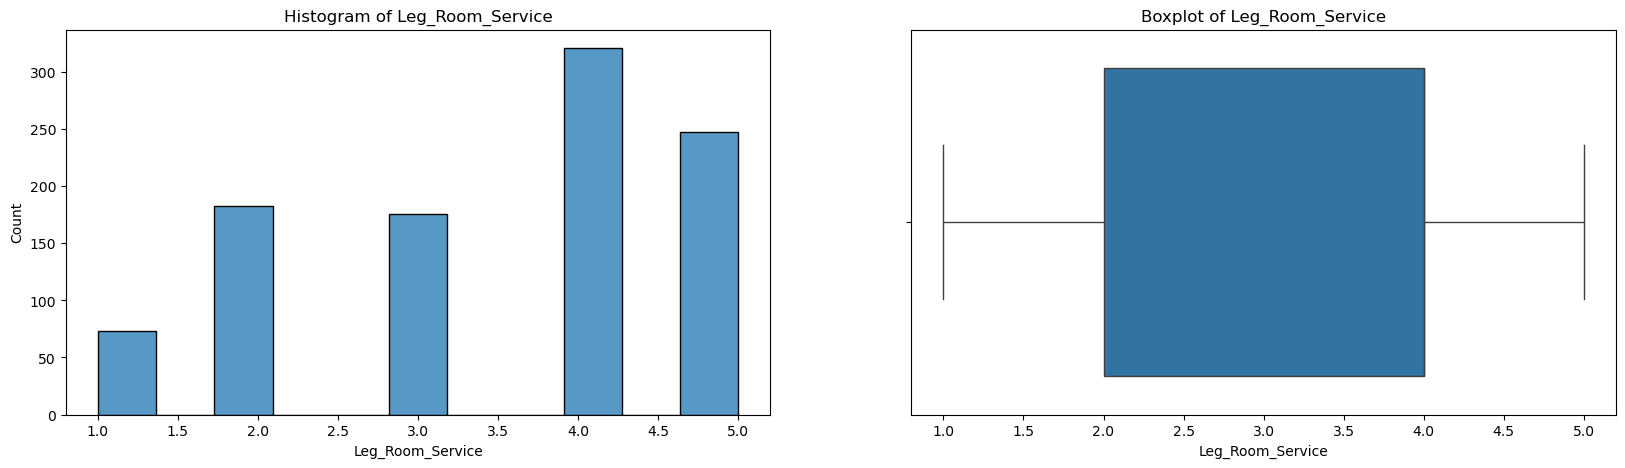

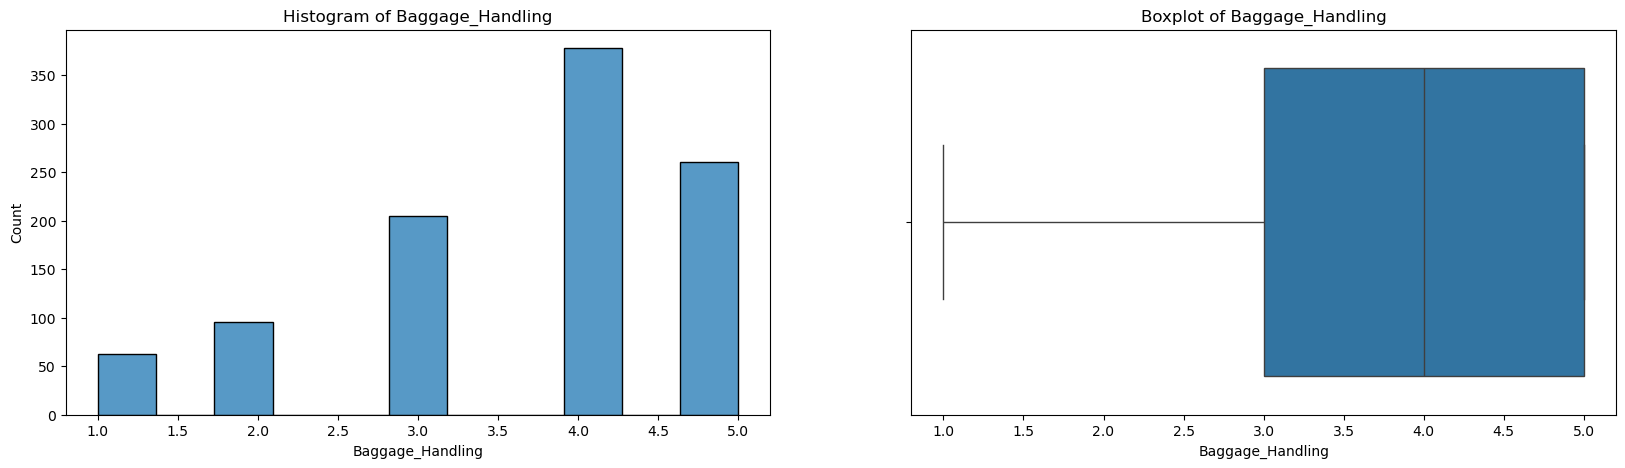

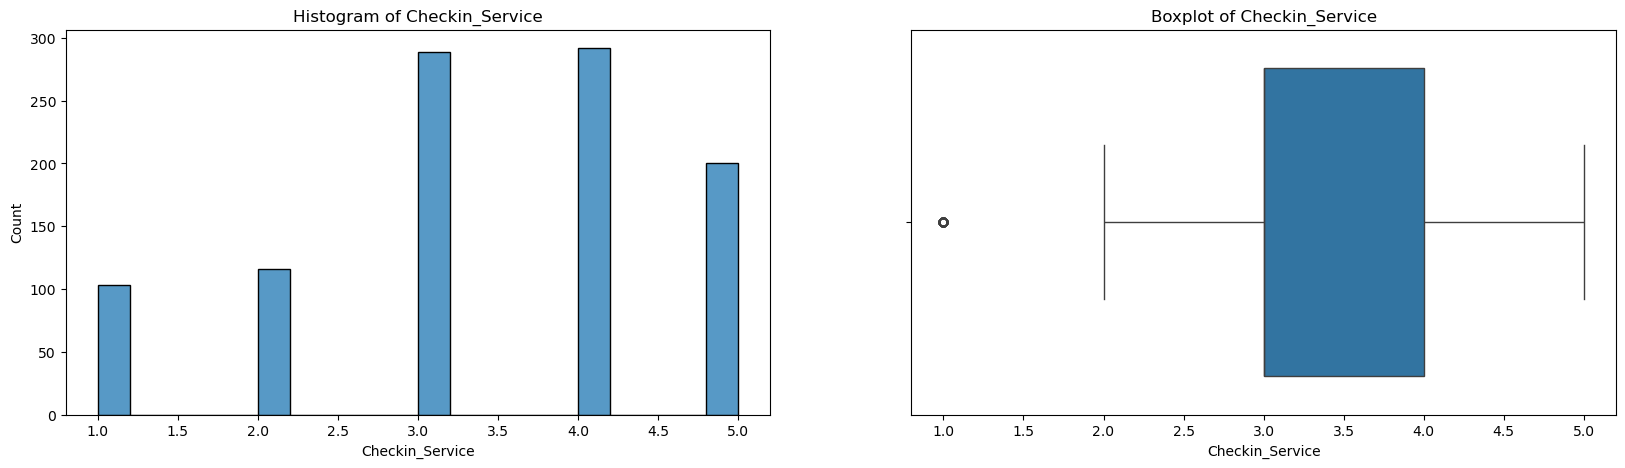

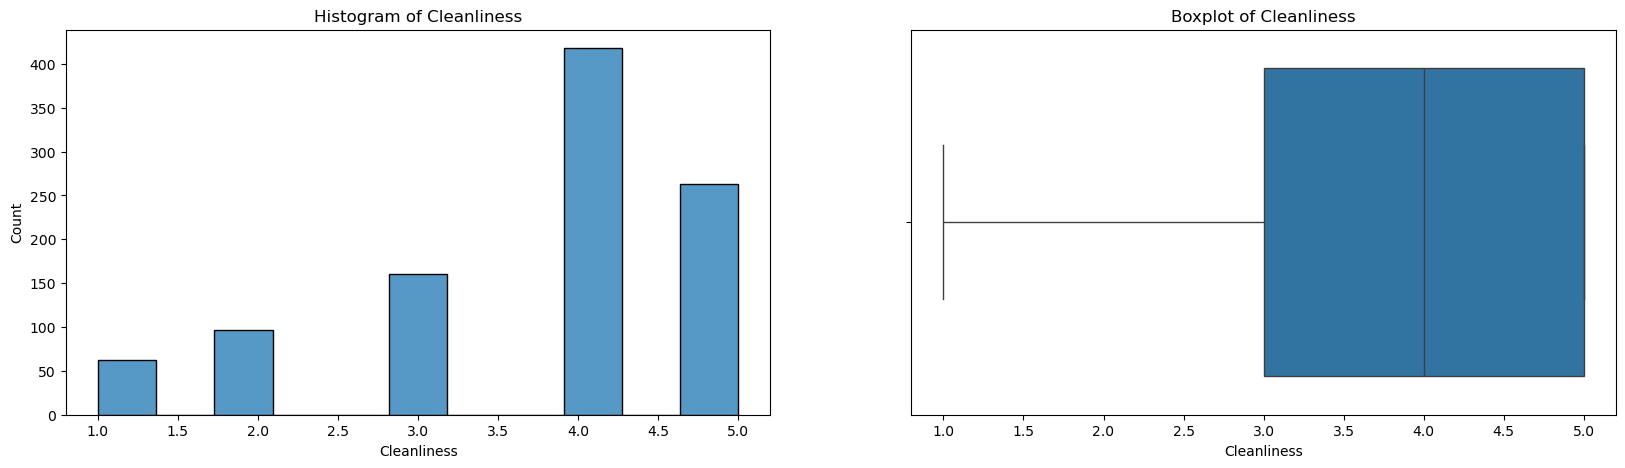

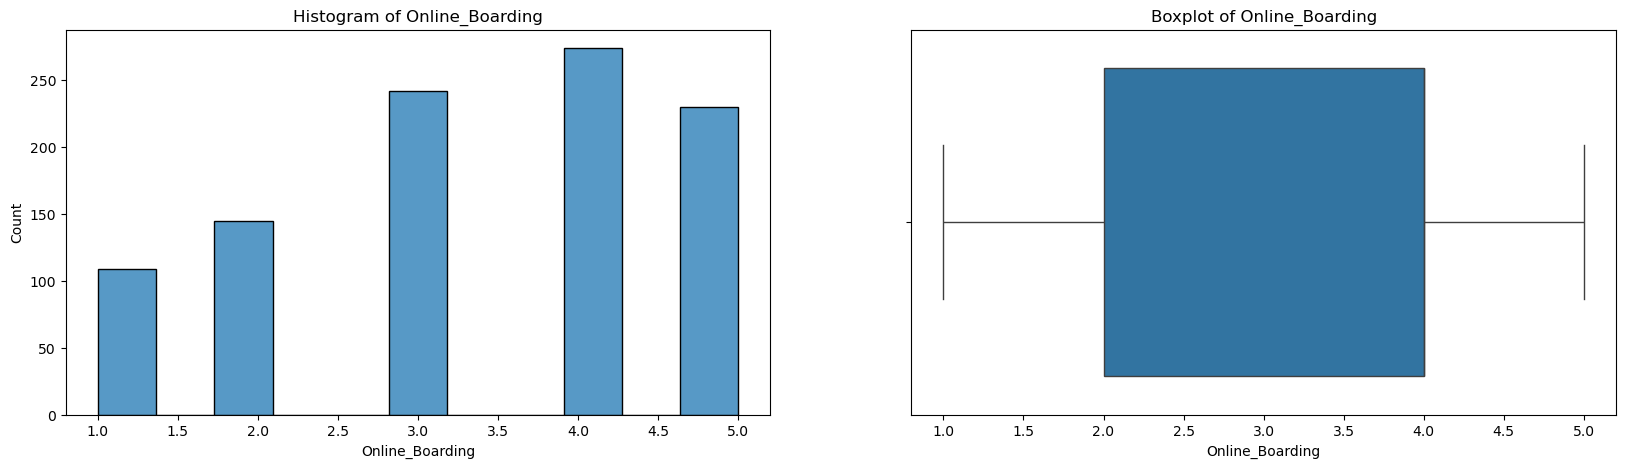

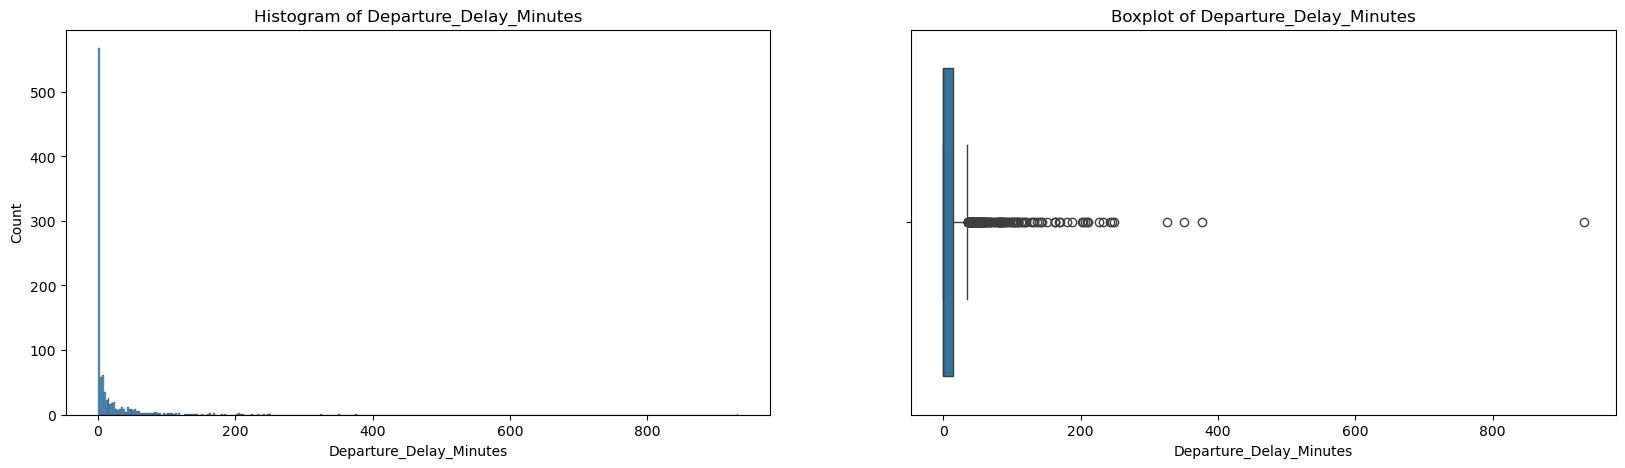

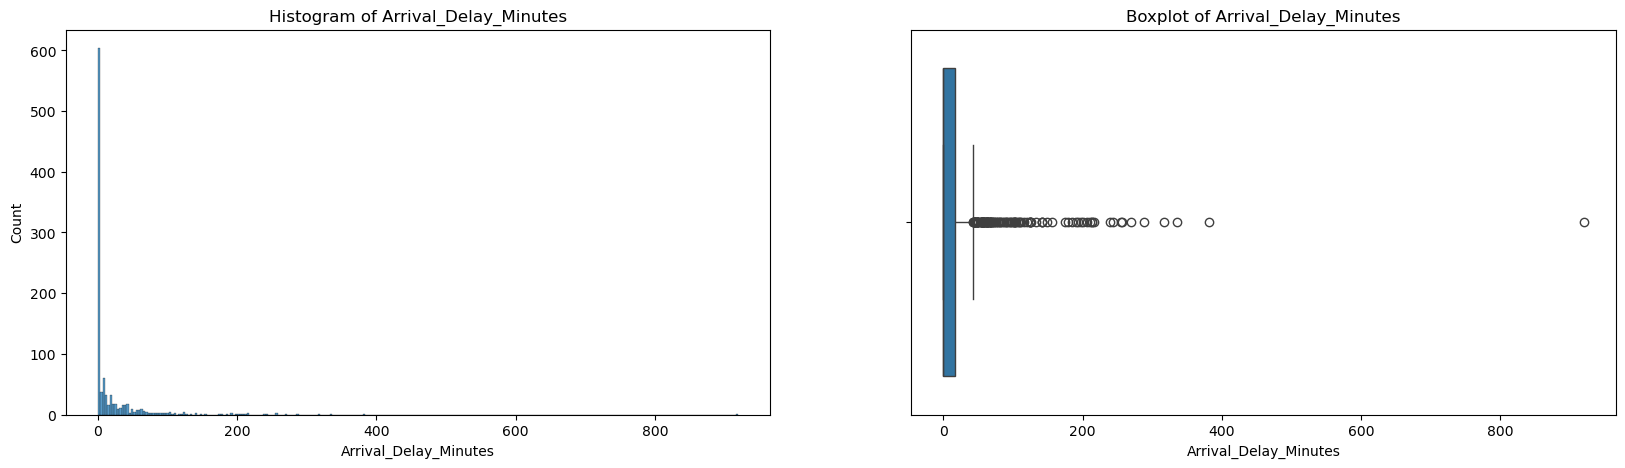

In [39]:
# Visualize the numerical columns using histograms and boxplots
for col in numerical_columns:
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    sns.histplot(sample_data[col], ax=ax[0])
    sns.boxplot(x=sample_data[col], ax=ax[1])
    ax[0].set_title(f'Histogram of {col}')
    ax[1].set_title(f'Boxplot of {col}')
    plt.show()

In [41]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)], lower_bound, upper_bound

columns_to_check = ['Flight_Distance', 'Departure_Delay_Minutes', 'Arrival_Delay_Minutes']
outlier_summary = {
    column: {
        "Number of Outliers": len(outliers),
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    }
    for column in columns_to_check
    for outliers, lower_bound, upper_bound in [detect_outliers_iqr(df, column)]
}
outlier_summary

{'Flight_Distance': {'Number of Outliers': 2581,
  'Lower Bound': -418.5,
  'Upper Bound': 4321.5},
 'Departure_Delay_Minutes': {'Number of Outliers': 18098,
  'Lower Bound': -18.0,
  'Upper Bound': 30.0},
 'Arrival_Delay_Minutes': {'Number of Outliers': 17492,
  'Lower Bound': -19.5,
  'Upper Bound': 32.5}}

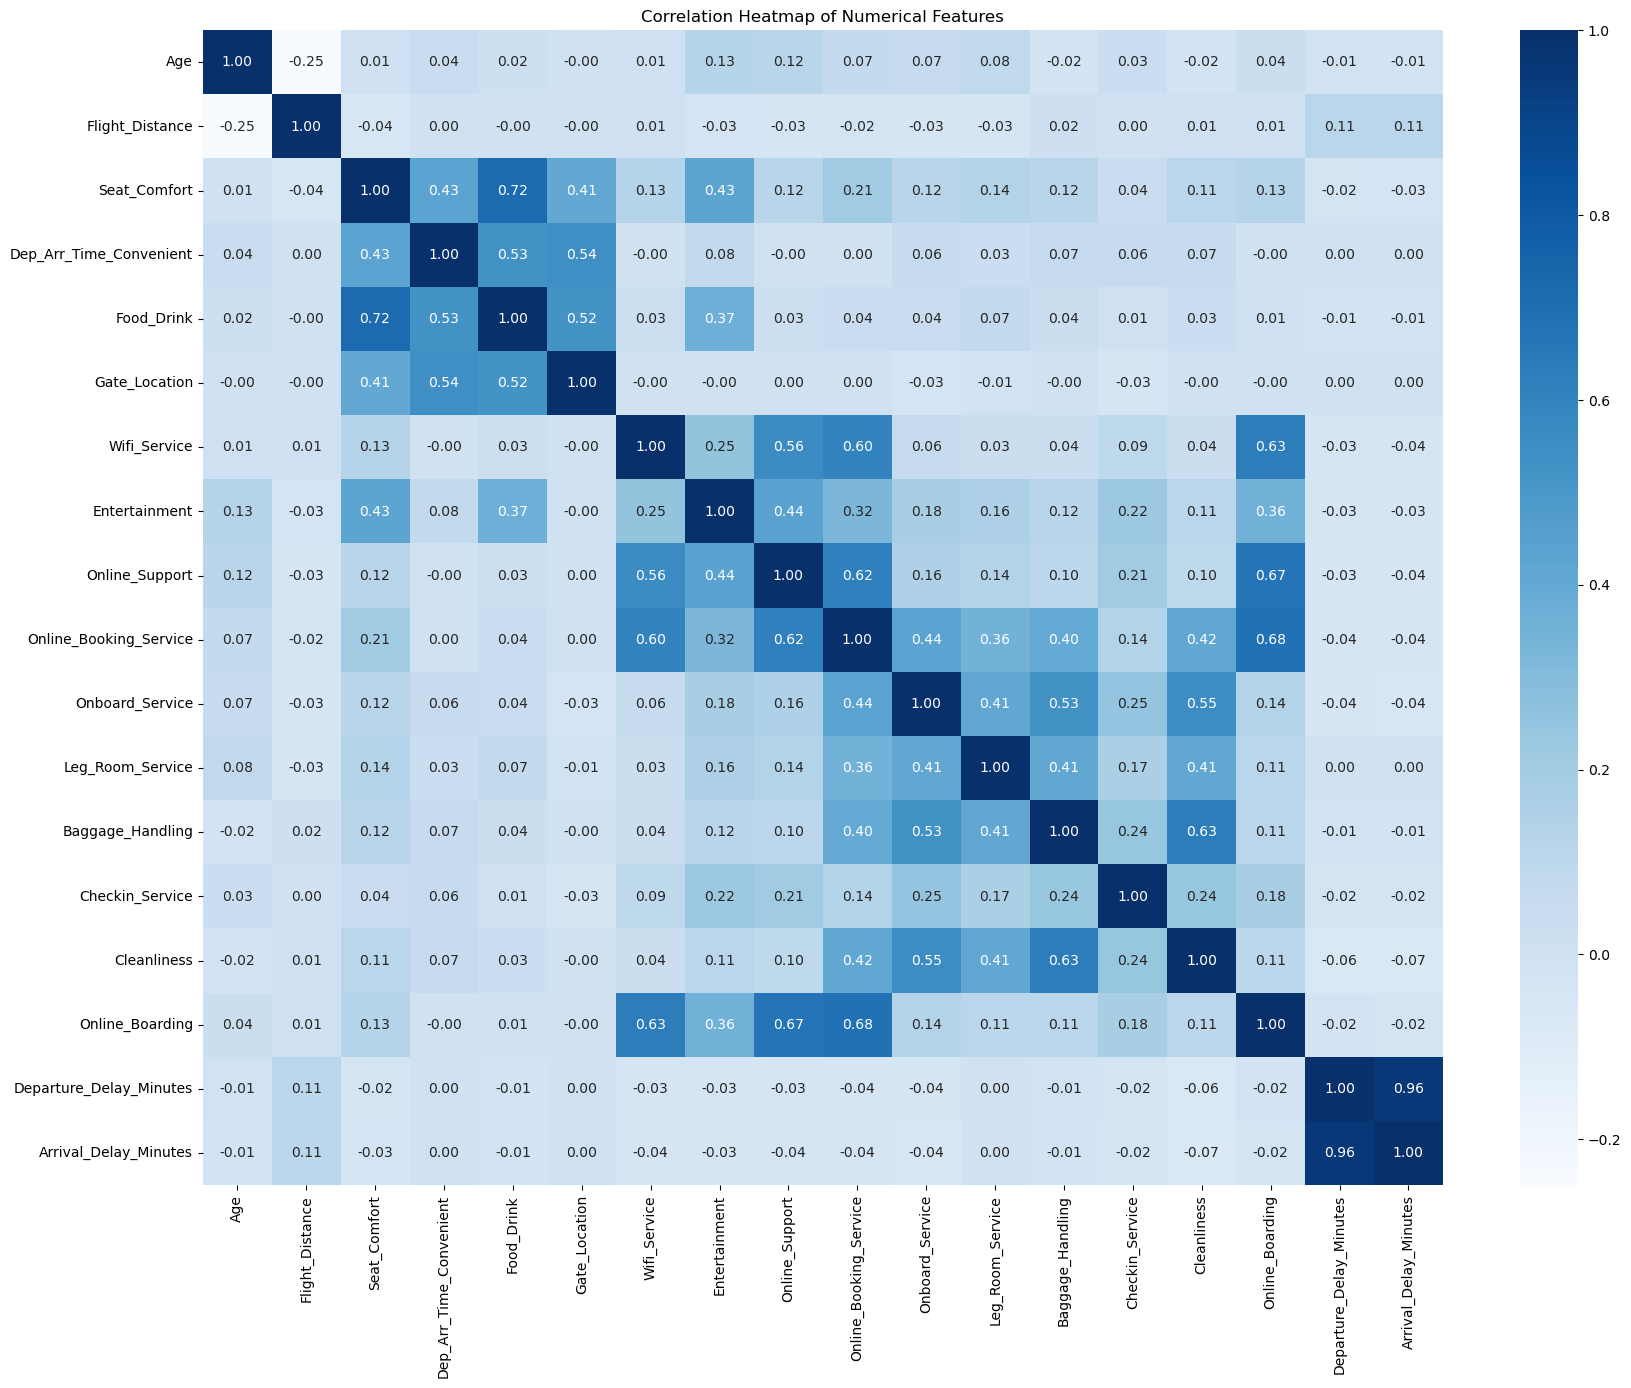

In [43]:
# Plot correlation heatmap of numerical features
plt.figure(figsize=(20, 15))
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt = '.2f', cmap='Blues')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<Axes: xlabel='Arrival_Delay_Minutes', ylabel='Departure_Delay_Minutes'>

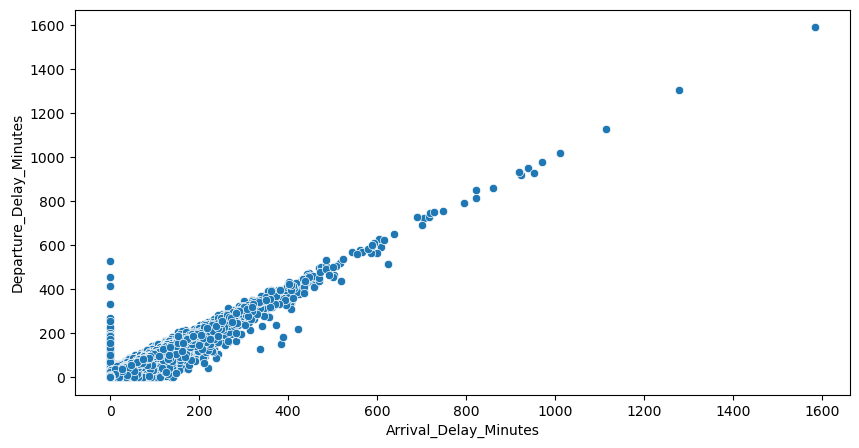

In [45]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Arrival_Delay_Minutes',y='Departure_Delay_Minutes')

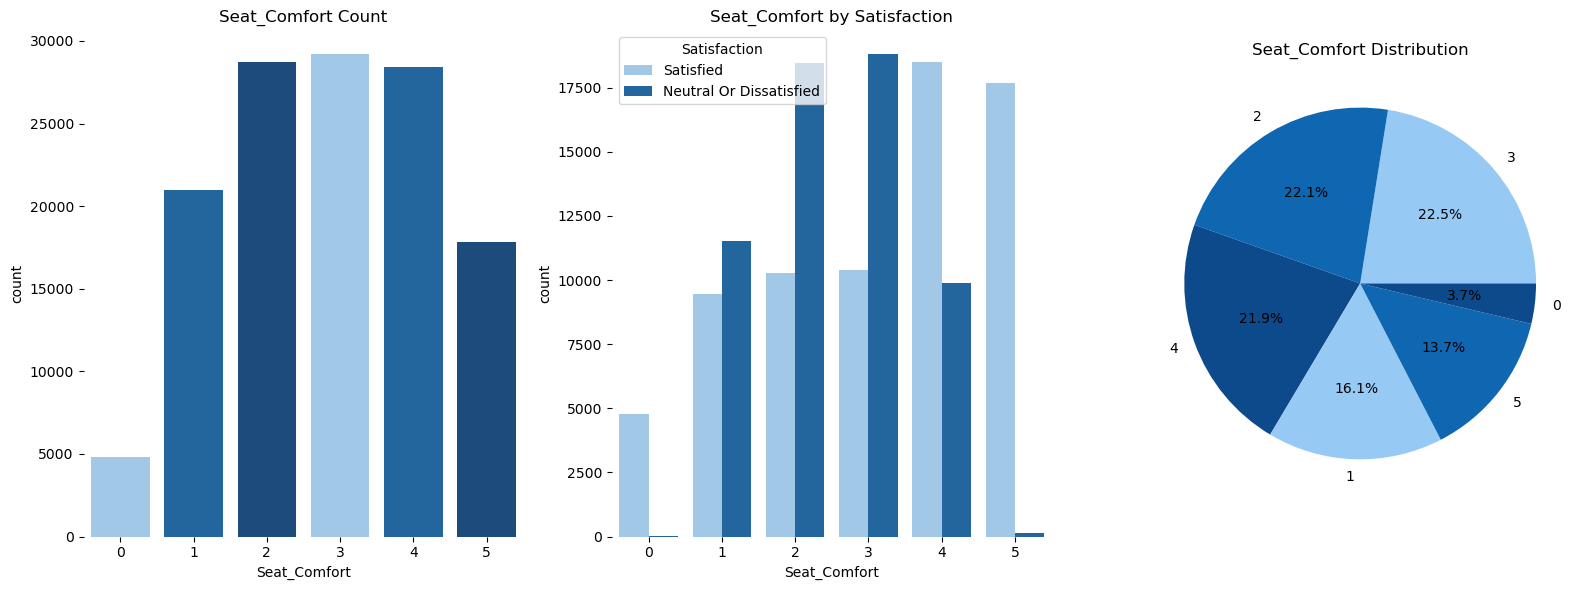

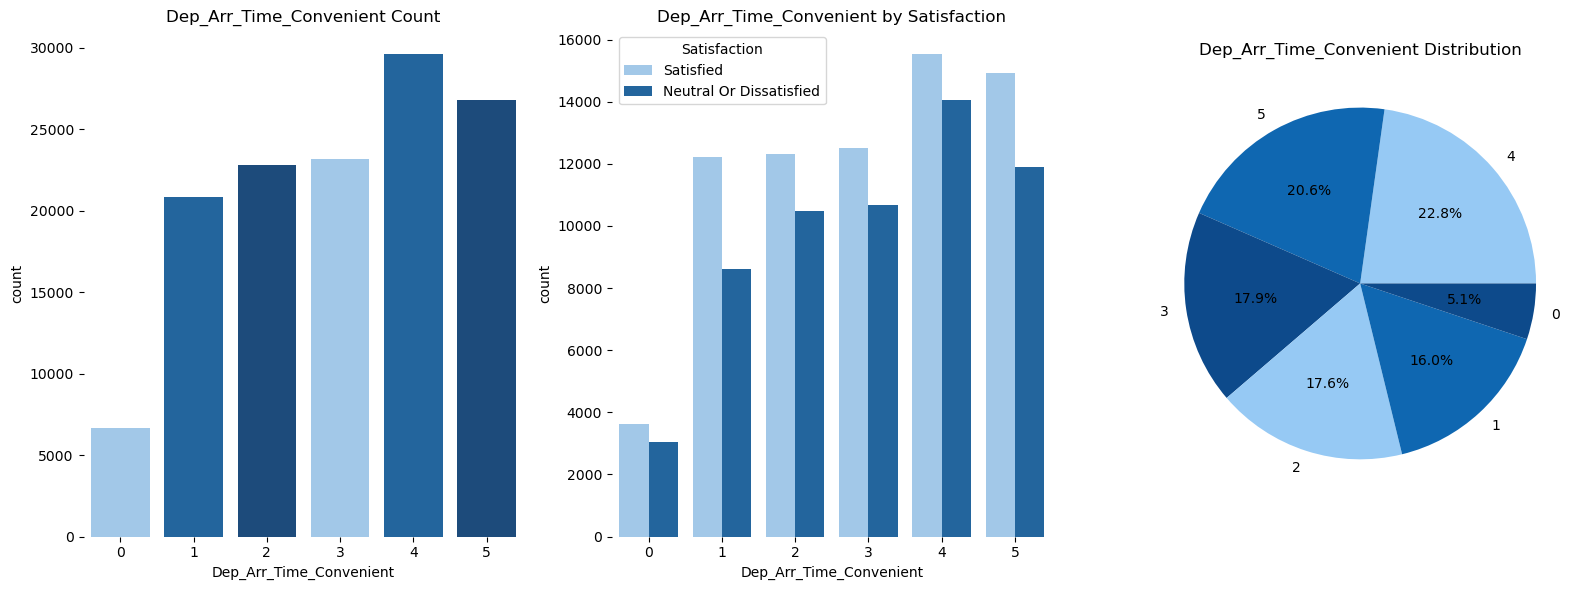

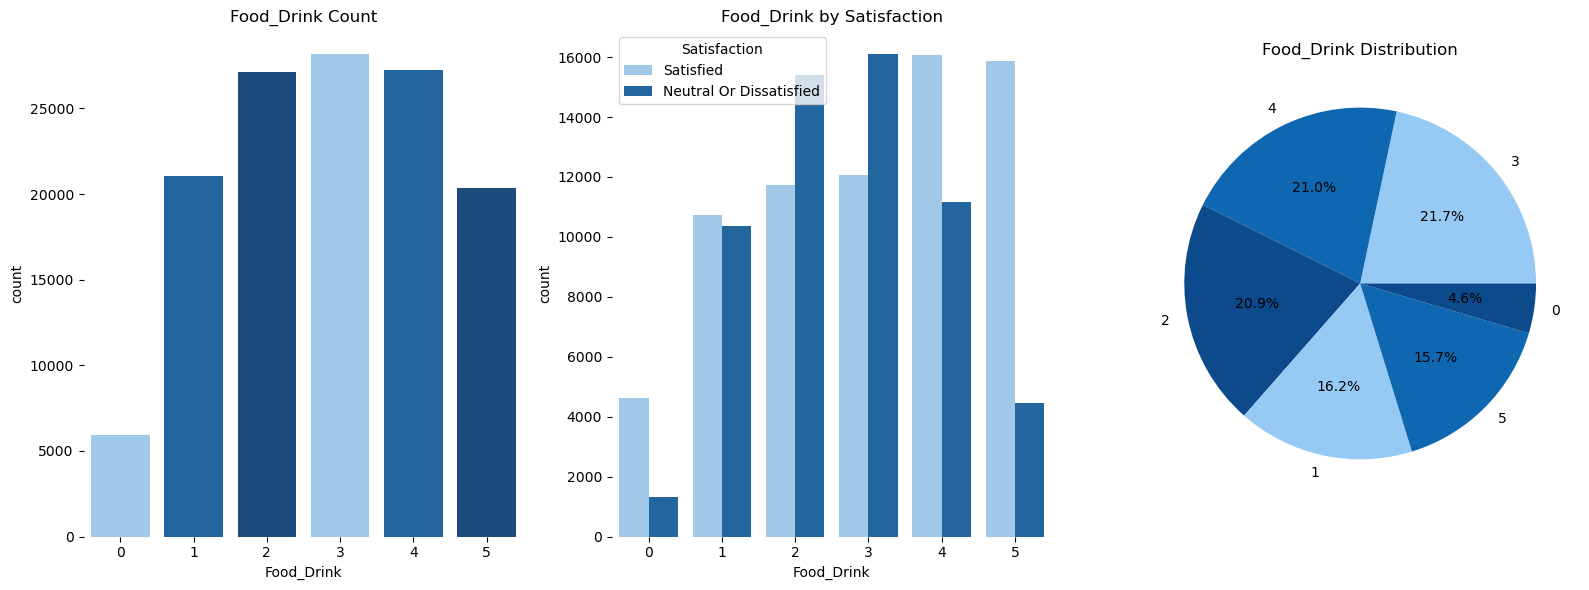

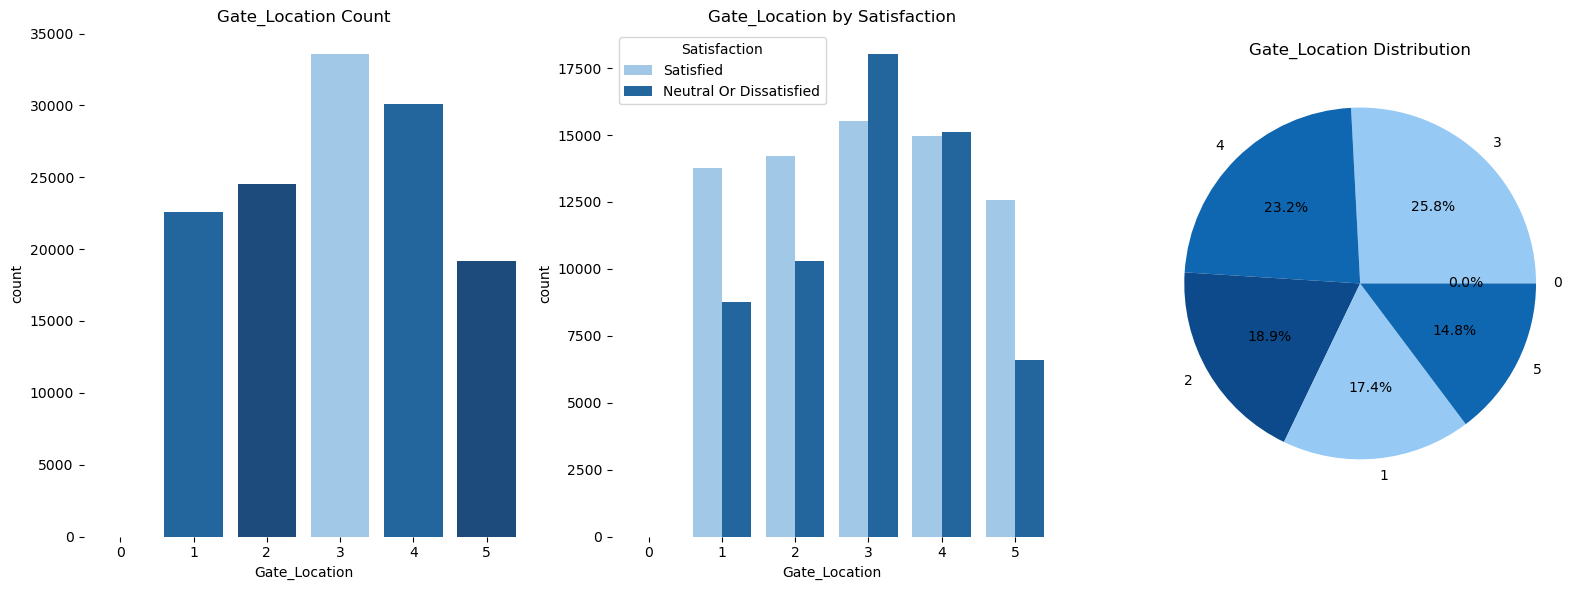

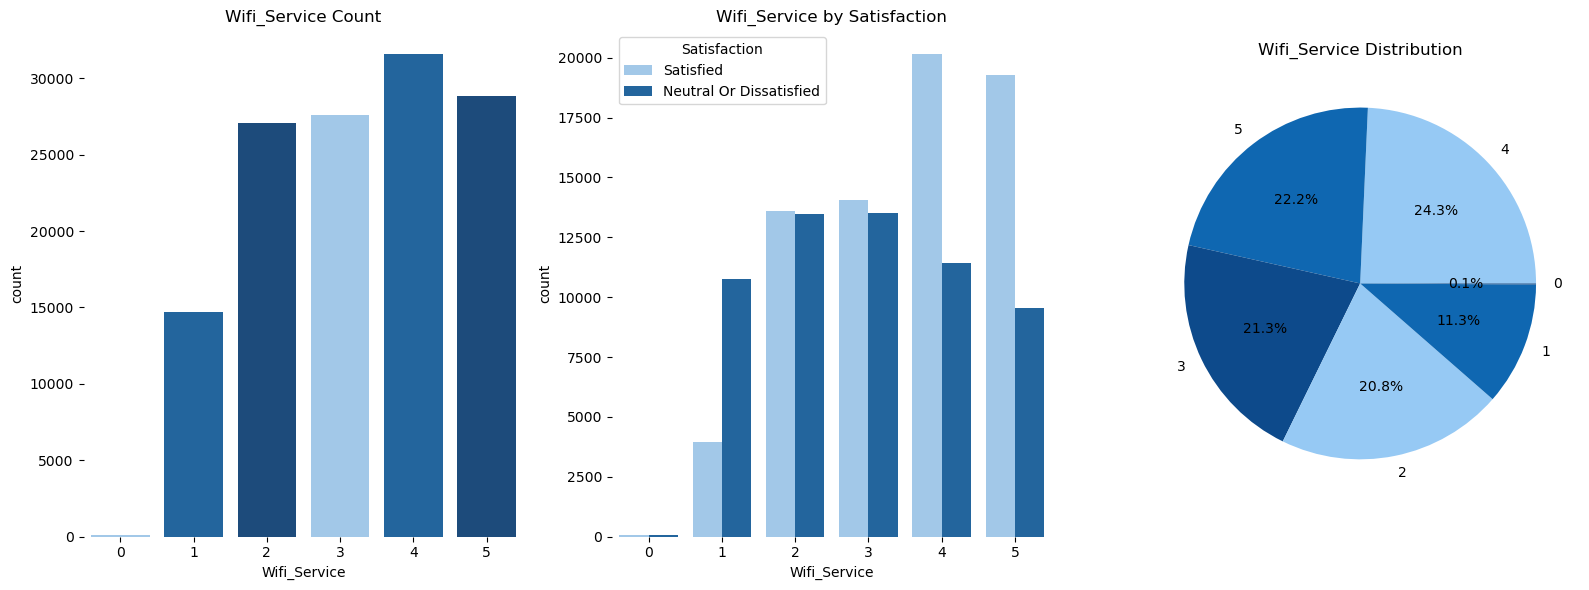

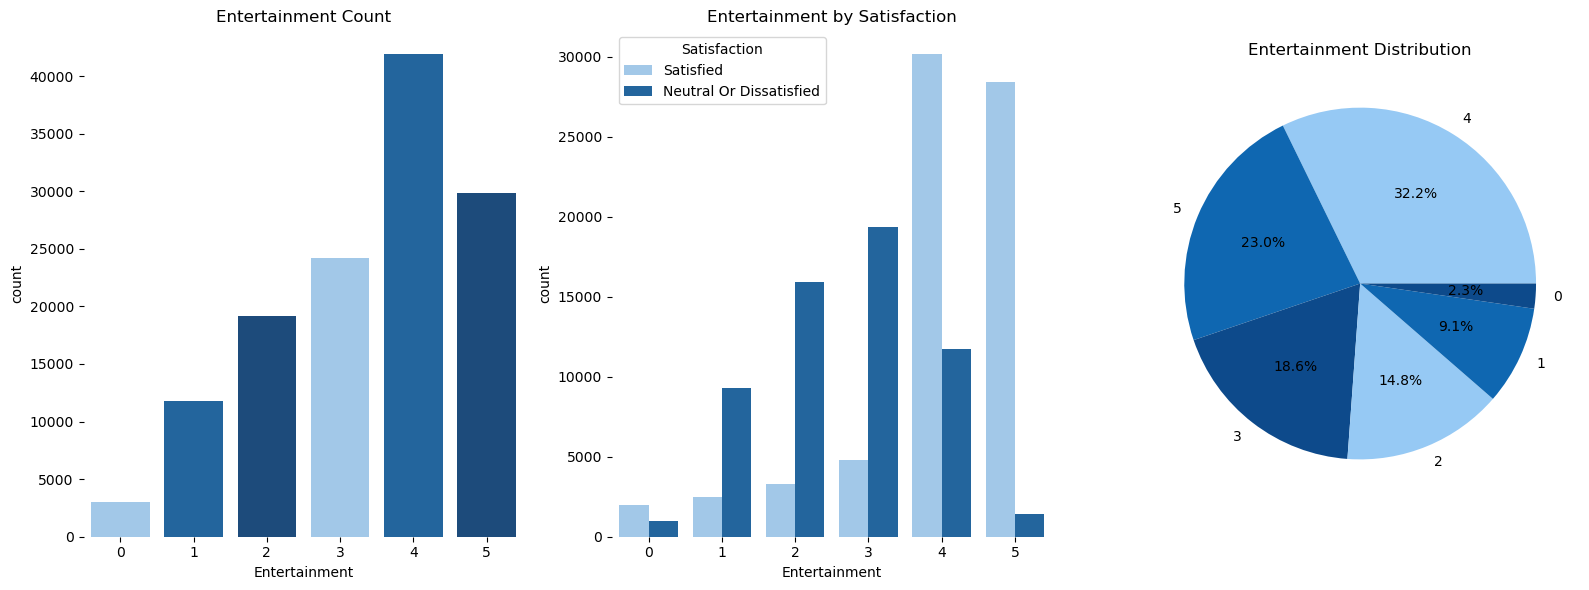

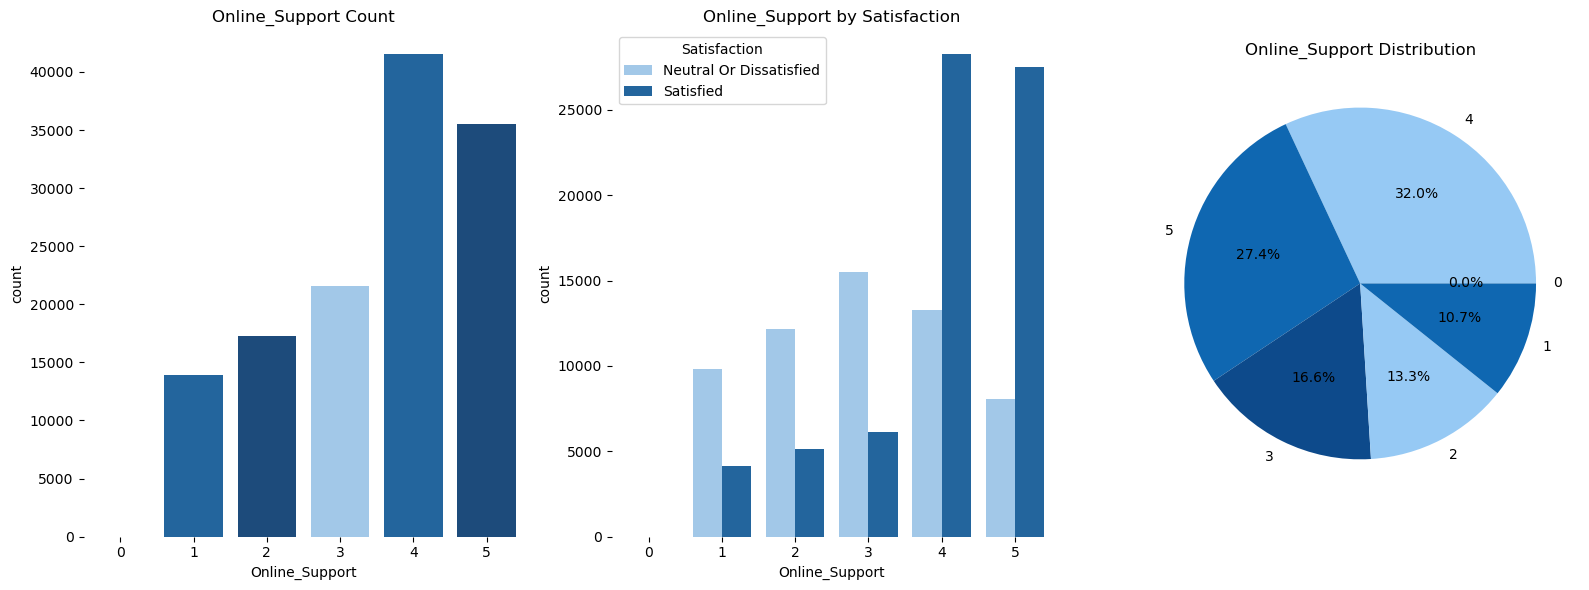

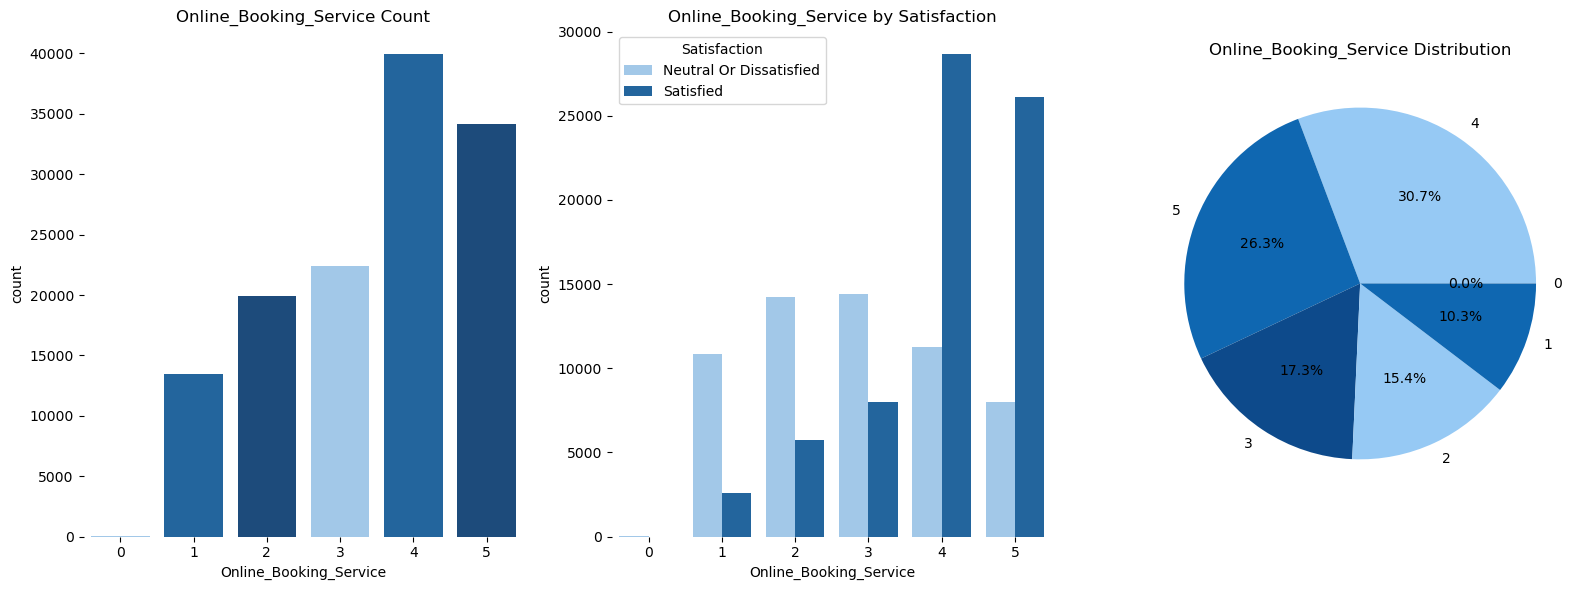

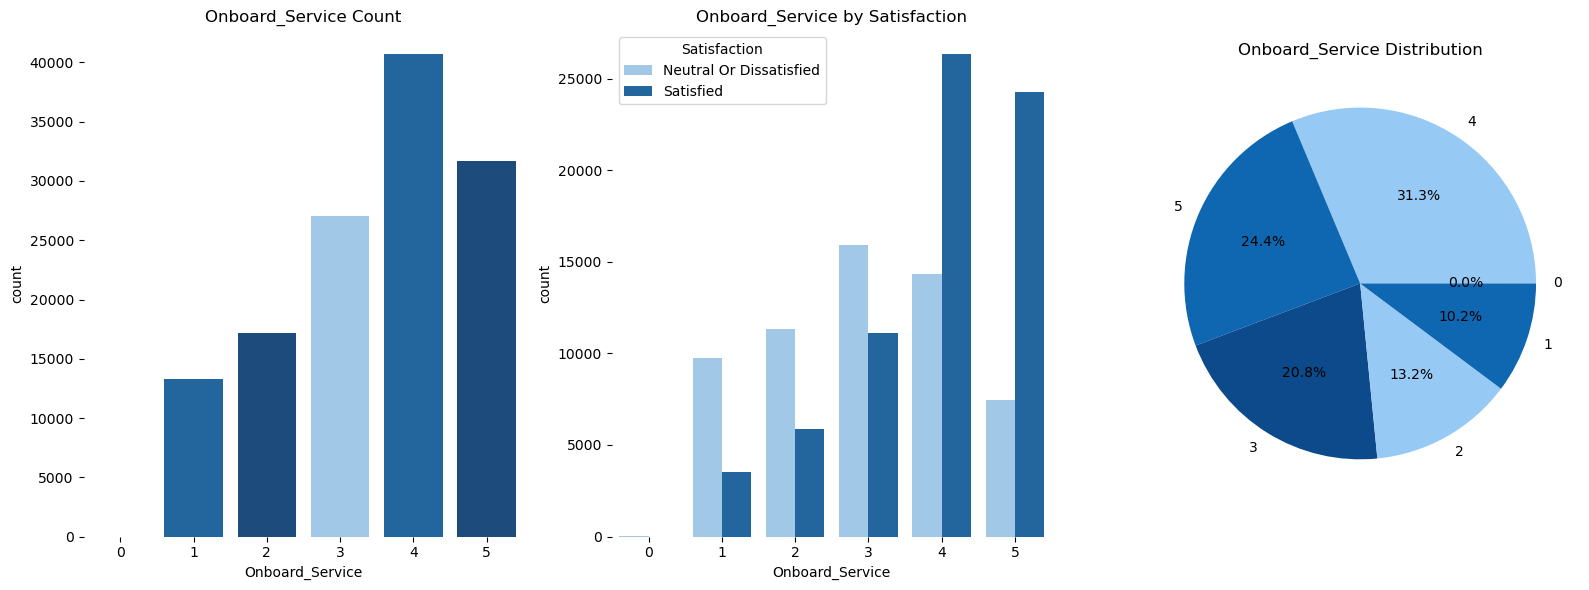

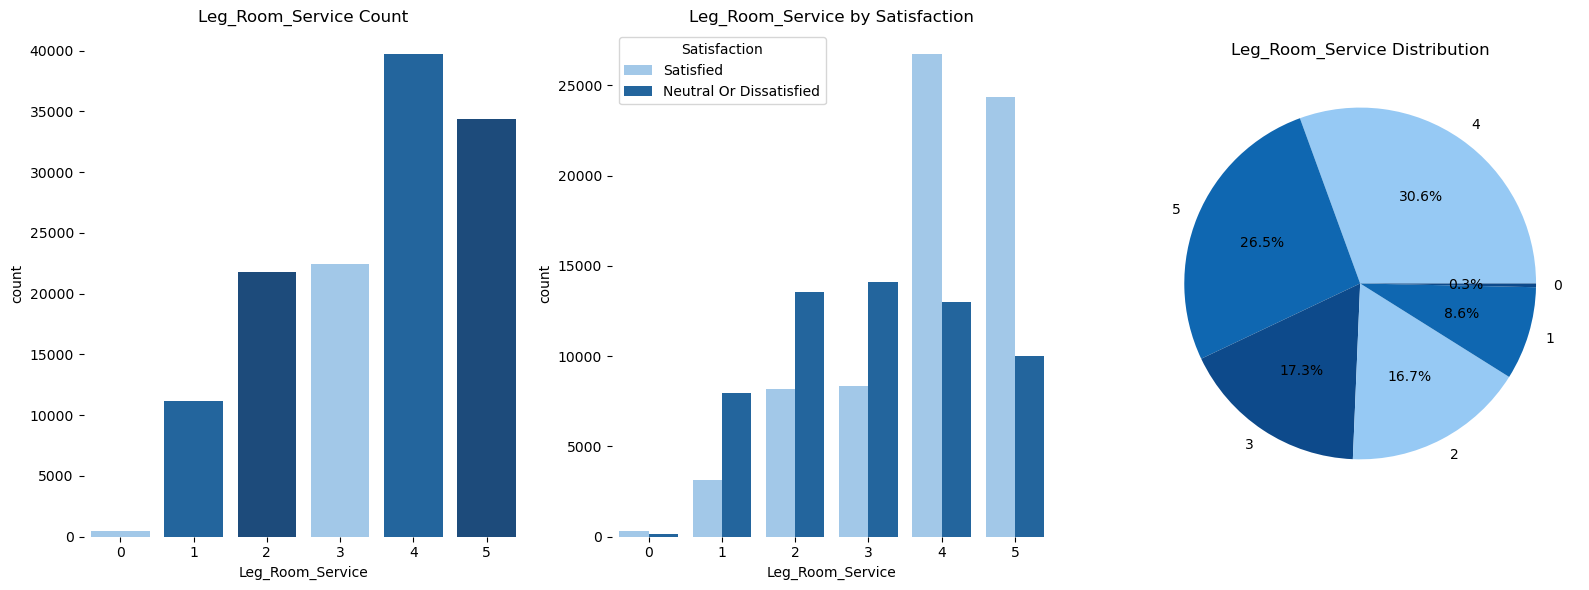

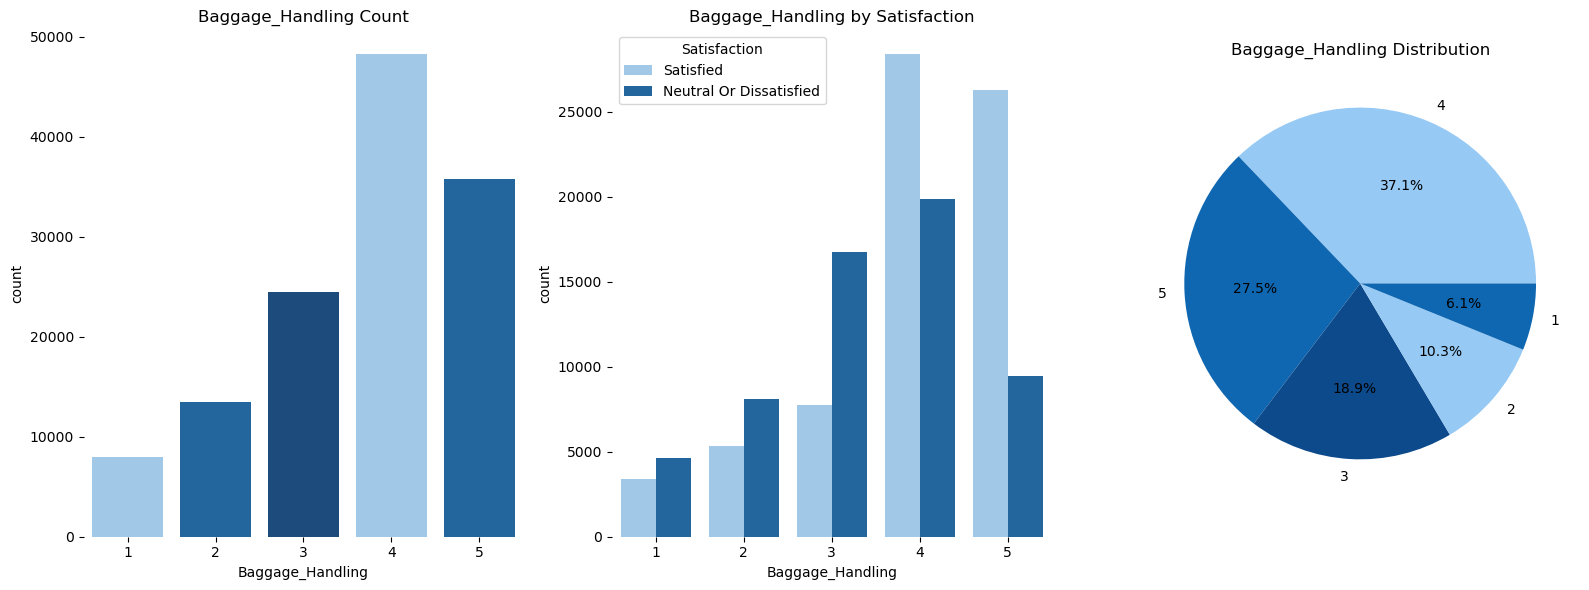

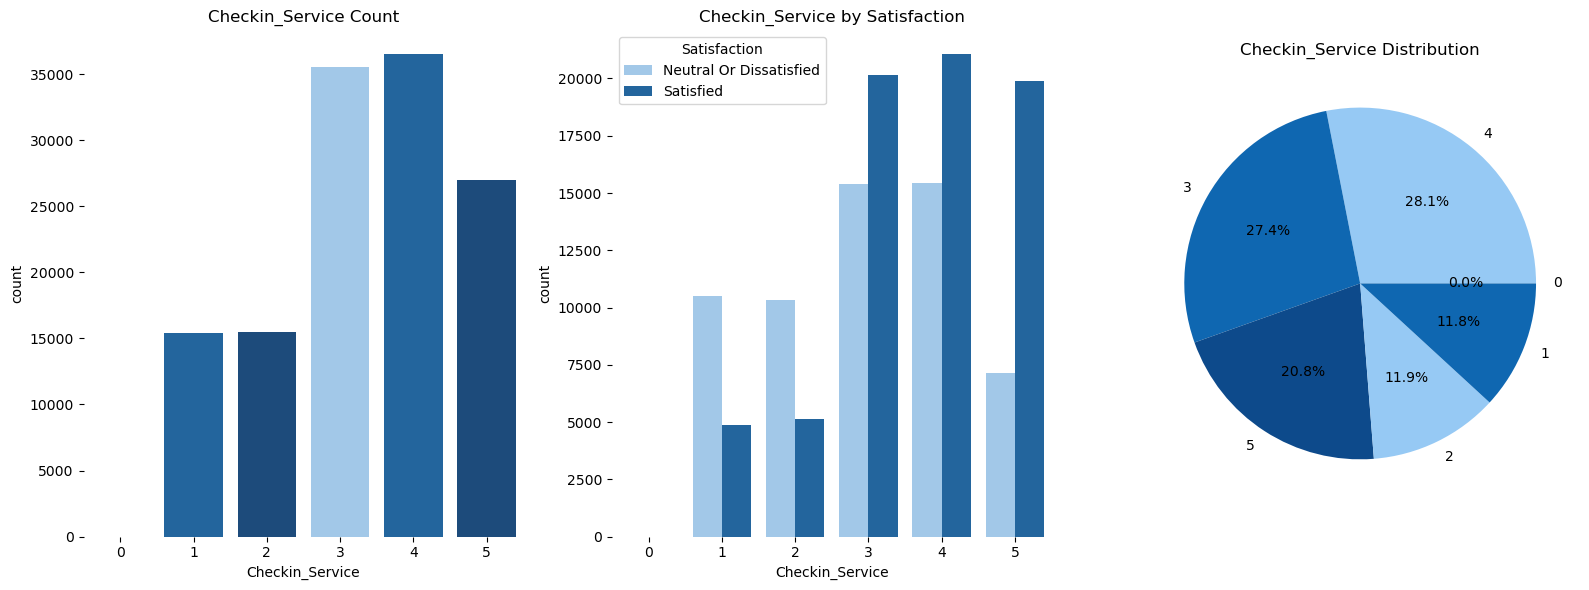

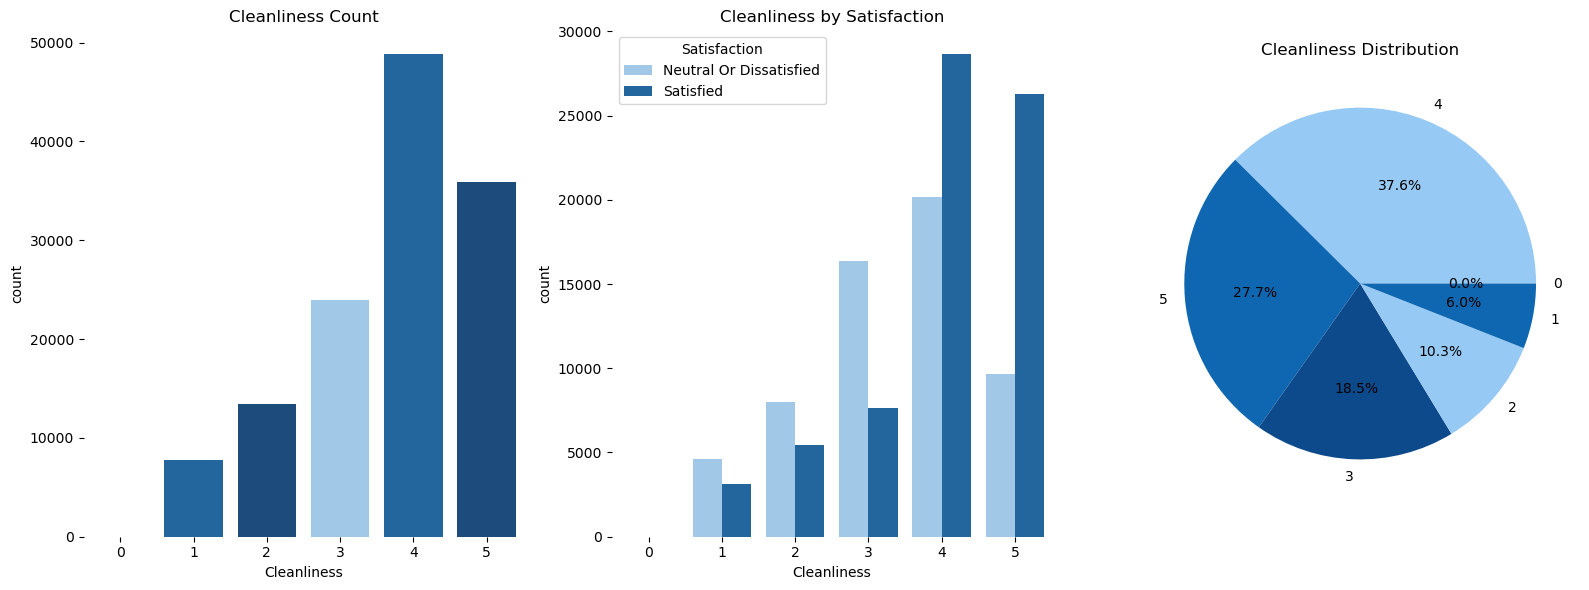

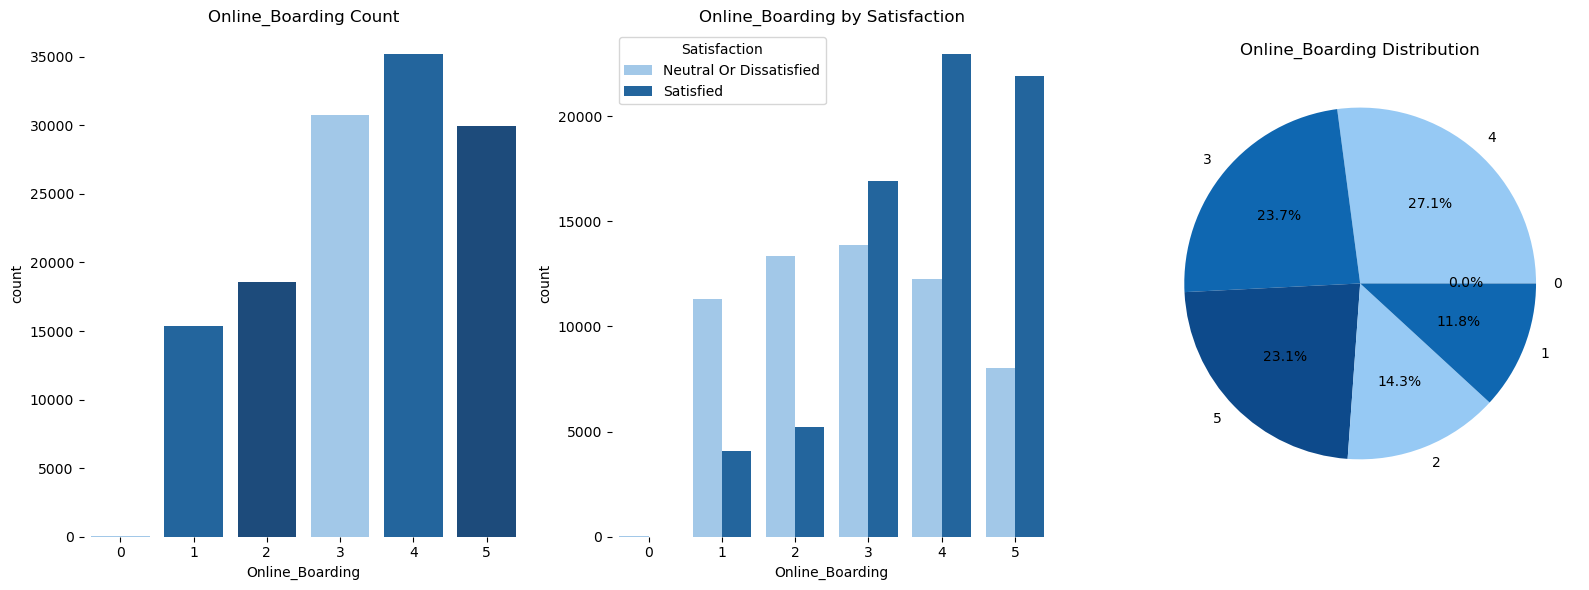

In [47]:
# Plot service related features
color_palette = ['#96C9F4', '#0F67B1', '#0D4A8B']
services = ['Seat_Comfort', 'Dep_Arr_Time_Convenient', 'Food_Drink', 'Gate_Location',
            'Wifi_Service', 'Entertainment', 'Online_Support', 'Online_Booking_Service', 
            'Onboard_Service', 'Leg_Room_Service', 'Baggage_Handling', 'Checkin_Service', 
            'Cleanliness', 'Online_Boarding']

def customize_axis(ax, title):
    ax.tick_params(colors='black')  
    ax.xaxis.label.set_color('black')  
    ax.yaxis.label.set_color('black')  
    for side in ['right', 'top', 'left', 'bottom']:
        ax.spines[side].set_visible(False)
    plt.title(title, color='black')

for i in services:
    plt.figure(figsize=(16, 6))

    # Subplot 1: Count plot
    plt.subplot(1, 3, 1)
    ax = sns.countplot(x=df[i], palette=color_palette)
    customize_axis(ax, f'{i} Count')

    # Subplot 2: Count plot by satisfaction
    plt.subplot(1, 3, 2)
    ax = sns.countplot(x=df[i], hue=df['Satisfaction'], palette=color_palette)
    customize_axis(ax, f'{i} by Satisfaction')

    # Subplot 3: Pie chart
    plt.subplot(1, 3, 3)
    df[i].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=color_palette)
    plt.ylabel('')
    plt.title(f'{i} Distribution', color='black')
    ax = plt.gca()
    for side in ['right', 'top', 'left', 'bottom']:
        ax.spines[side].set_visible(False)

    plt.tight_layout()
    plt.show()

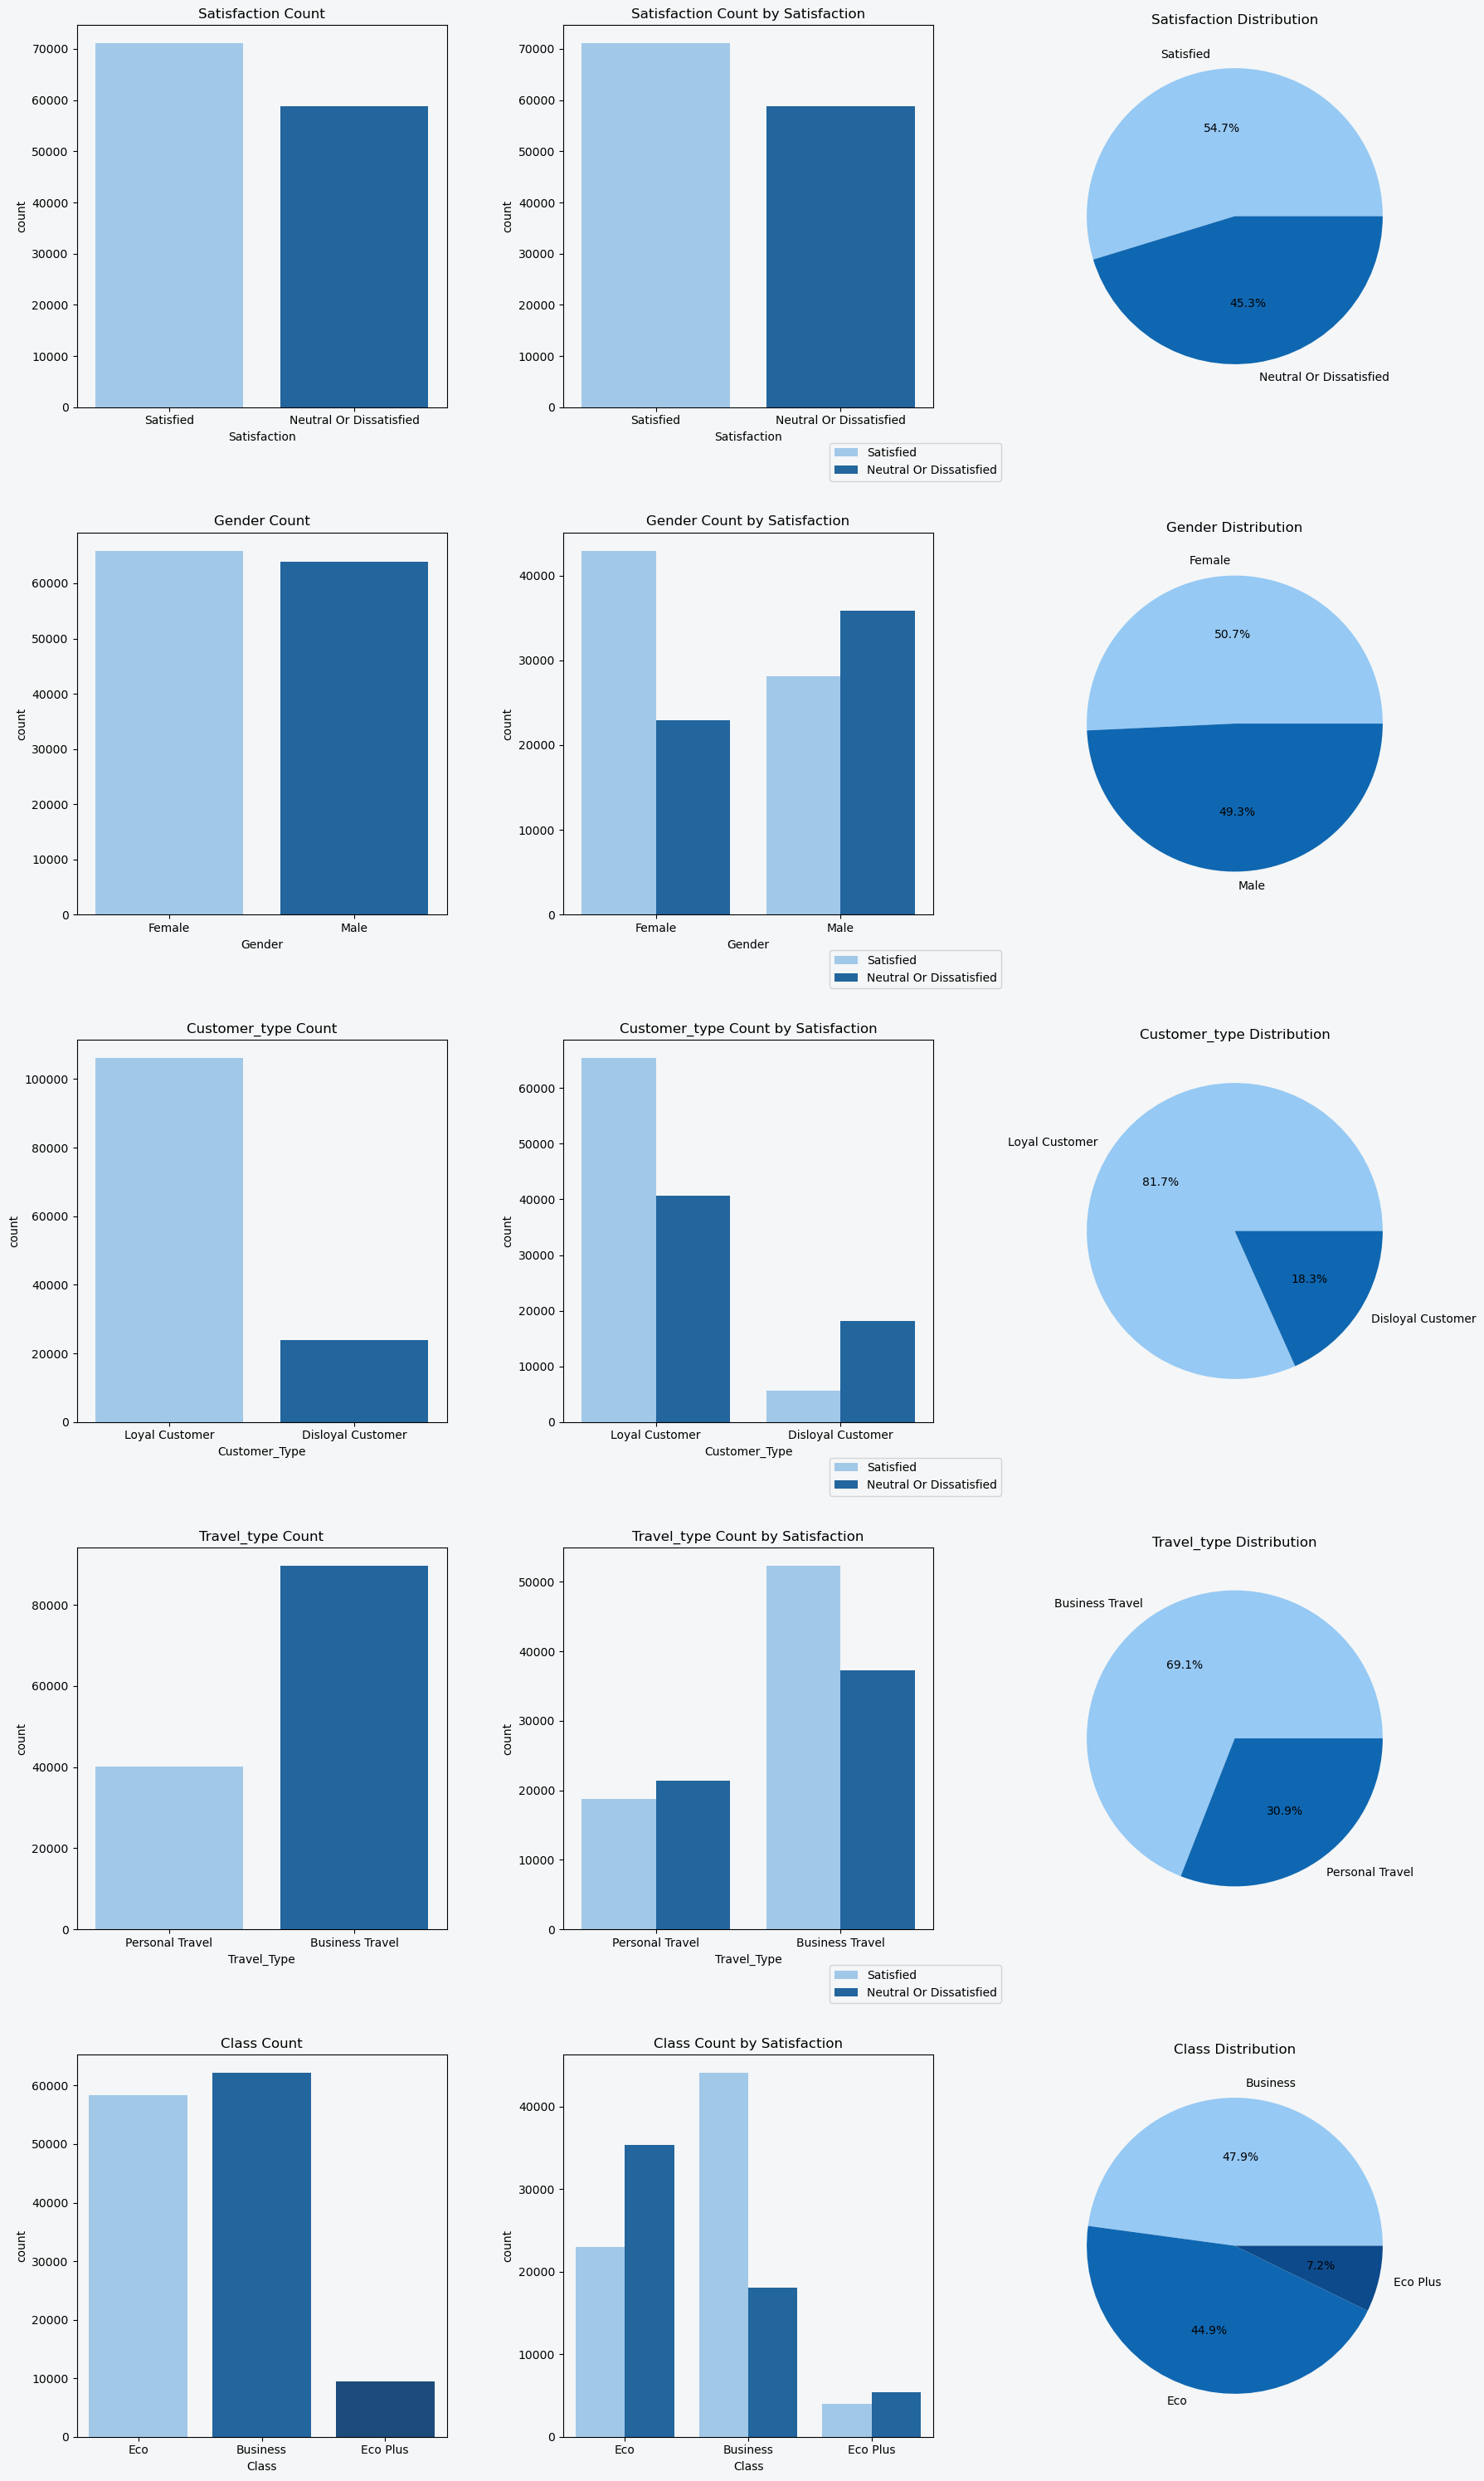

In [49]:
# Visualize categorical columns
def visualize_categorical_columns(df, categorical_columns, color_palette=['#96C9F4', '#0F67B1', '#0D4A8B']):
    plt.rcParams.update({
        'axes.facecolor': '#F4F6F7',  
        'figure.facecolor': '#F4F6F7',  
        'grid.color': '#444444',  
        'grid.linestyle': '-',  
        'text.color': 'black',  
        'axes.labelcolor': 'black',  
        'xtick.color': 'black',  
        'ytick.color': 'black'  
    })
    
    num_columns = len(categorical_columns)
    fig, axes = plt.subplots(num_columns, 3, figsize=(18, 6 * num_columns))
    
    if num_columns == 1:
        axes = [axes]

    for i, column in enumerate(categorical_columns):
        # Subplot 1: Column count
        sns.countplot(x=df[column], palette=color_palette, data=df, ax=axes[i][0])
        axes[i][0].set_title(f'{column.capitalize()} Count', color='black')
        for spine in axes[i][0].spines.values():
            spine.set_visible(True)
            spine.set_color('black')

        # Subplot 2: Count by Satisfaction
        sns.countplot(x=df[column], hue='Satisfaction', palette=color_palette, data=df, ax=axes[i][1])
        axes[i][1].set_title(f'{column.capitalize()} Count by Satisfaction', color='black')
        for spine in axes[i][1].spines.values():
            spine.set_visible(True)
            spine.set_color('black')
        handles, labels = axes[i][1].get_legend_handles_labels()
        if handles:
            axes[i][1].legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(1.2, 1.25))

        # Subplot 3: Distribution
        df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=color_palette, wedgeprops=dict(edgecolor='none'), ax=axes[i][2])
        axes[i][2].set_title(f'{column.capitalize()} Distribution', color='black')
        axes[i][2].set_ylabel('')
        
    plt.tight_layout()
    plt.show()

visualize_categorical_columns(df, categorical_columns)

<Axes: xlabel='Arrival_Delay_Minutes', ylabel='Departure_Delay_Minutes'>

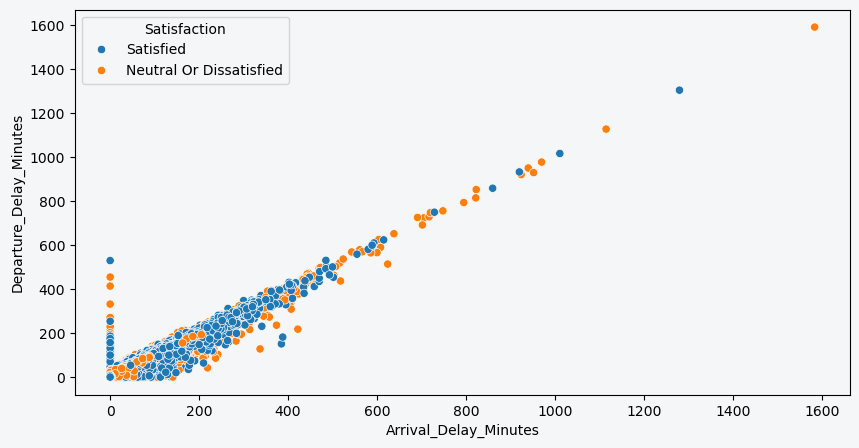

In [50]:
# Check the correlation between arrival delay and departure delay minutes
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Arrival_Delay_Minutes',y='Departure_Delay_Minutes',hue='Satisfaction')

### Feature Engineering

#### Log Transformation for Skewed Numeric Columns

In [53]:
skewed_columns = ['Flight_Distance', 'Departure_Delay_Minutes', 'Arrival_Delay_Minutes']
for col in skewed_columns:
    df[col] = np.log1p(df[col])
    
df[skewed_columns].describe()

Flight_Distance  Departure_Delay_Minutes  Arrival_Delay_Minutes
count    129880.000000            129880.000000          129880.000000
mean          7.395809                 1.233811               1.259571
std           0.737684                 1.617675               1.628861
min           3.931826                 0.000000               0.000000
25%           7.215240                 0.000000               0.000000
50%           7.563201                 0.000000               0.000000
75%           7.841886                 2.564949               2.639057
max           8.846785                 7.373374               7.368340

#### Categorical Encoding

In [55]:
# Apply label encoding for binary categories
binary_columns = ['Gender', 'Customer_Type', 'Travel_Type', 'Satisfaction']
label_encoder = LabelEncoder()
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Apply one-hot encoding for multi-category features
df = pd.get_dummies(df, columns=['Class'], drop_first=True)
df.head()

Gender  Customer_Type  Age  Travel_Type  Flight_Distance  Seat_Comfort  \
0       0              1   65            1         5.583496             0   
1       1              1   47            1         7.809947             0   
2       0              1   15            1         7.668094             0   
3       0              1   60            1         6.436150             0   
4       0              1   70            1         5.872118             0   

   Dep_Arr_Time_Convenient  Food_Drink  Gate_Location  Wifi_Service  \
0                        0           0              2             2   
1                        0           0              3             0   
2                        0           0              3             2   
3                        0           0              3             3   
4                        0           0              3             4   

   Entertainment  Online_Support  Online_Booking_Service  Onboard_Service  \
0              4               2                       3                3   
1              2               2                       3                4   
2              0               2                       2                3   
3              4               3                       1                1   
4              3               4                       2                2   

   Leg_Room_Service  Baggage_Handling  Checkin_Service  Cleanliness  \
0                 0                 3                5            3   
1                 4                 4                2            3   
2                 3                 4                4            4   
3                 0                 1                4            1   
4                 0                 2                4            2   

   Online_Boarding  Departure_Delay_Minutes  Arrival_Delay_Minutes  \
0                2                 0.000000               0.000000   
1                2                 5.739793               5.723585   
2                2                 0.000000               0.000000   
3                3                 0.000000               0.000000   
4                5                 0.000000               0.000000   

   Satisfaction  Class_Eco  Class_Eco Plus  
0             1       True           False  
1             1      False           False  
2             1       True           False  
3             1       True           False  
4             1       True           False

### Feature Scaling

In [57]:
scaler = StandardScaler()
numerical_columns = [
    'Flight_Distance', 'Departure_Delay_Minutes', 'Arrival_Delay_Minutes']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df[numerical_columns].head()

Flight_Distance  Departure_Delay_Minutes  Arrival_Delay_Minutes
0        -2.456770                -0.762709              -0.773286
1         0.561405                 2.785478               2.740584
2         0.369109                -0.762709              -0.773286
3        -1.300912                -0.762709              -0.773286
4        -2.065515                -0.762709              -0.773286

In [59]:
# Define features and target
features = df.drop(columns=['Satisfaction'])  
target = df['Satisfaction']

In [61]:
# Split dataset into training and testing sets
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=42) 

### Feature Selection

                    Feature  Importance
10            Entertainment    0.202019
5              Seat_Comfort    0.131954
12   Online_Booking_Service    0.083090
11           Online_Support    0.058150
13          Onboard_Service    0.046985
1             Customer_Type    0.044290
7                Food_Drink    0.038975
4           Flight_Distance    0.035960
14         Leg_Room_Service    0.034995
18          Online_Boarding    0.033021
2                       Age    0.031534
3               Travel_Type    0.031227
0                    Gender    0.029782
15         Baggage_Handling    0.029706
6   Dep_Arr_Time_Convenient    0.025551
16          Checkin_Service    0.025156
17              Cleanliness    0.023589
21                Class_Eco    0.023482
8             Gate_Location    0.019676
9              Wifi_Service    0.016474
20    Arrival_Delay_Minutes    0.016005
19  Departure_Delay_Minutes    0.014490
22           Class_Eco Plus    0.003890


Text(0, 0.5, 'Feature')

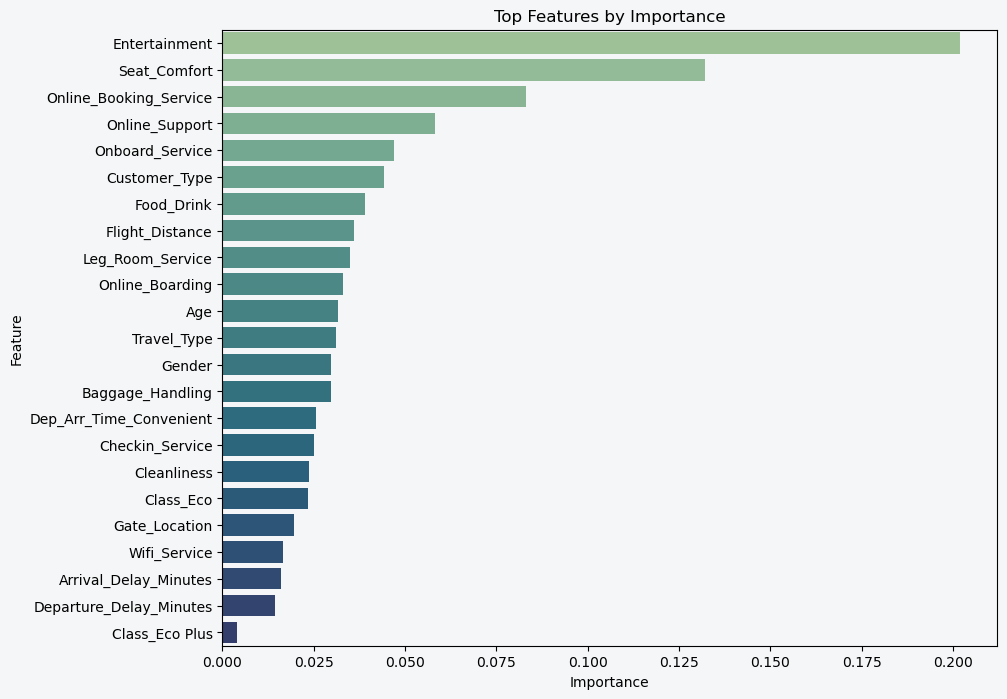

In [63]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(feature_train, target_train)

# Get feature importance scores
feature_importance = pd.DataFrame({
    'Feature': feature_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(25), palette='crest')
plt.title('Top Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

In [65]:
# Identify low-importance features
low_importance_features = feature_importance[feature_importance['Importance'] < 0.01]['Feature']
print("Low Importance Features to Drop:", low_importance_features.tolist())

feature_train = feature_train.drop(columns=low_importance_features)
feature_test = feature_test.drop(columns=low_importance_features)

Low Importance Features to Drop: ['Class_Eco Plus']


In [67]:
# Drop some features
df=df.drop(['Class_Eco Plus', 'Departure_Delay_Minutes'],axis=1)

## Models Building

### Run Cross-Validation for different models

In [69]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "RidgeClassifier": RidgeClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "GaussianNB": GaussianNB(),
    "LinearDiscriminantAnalysis (LDA)": LinearDiscriminantAnalysis(),
    "QuadraticDiscriminantAnalysis (QDA)": QuadraticDiscriminantAnalysis(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoostClassifier": CatBoostClassifier()
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, clf in classifiers.items():
    try:
        cv_scores = cross_val_score(clf, feature_train, target_train, cv=kf, scoring='accuracy')
        results.append({
            "Classifier": name,
            "Mean Accuracy": cv_scores.mean(),
            "Std Dev": cv_scores.std()
        })
    except Exception as e:
        results.append({
            "Classifier": name,
            "Mean Accuracy": None,
            "Std Dev": None
        })
results_df = pd.DataFrame(results)
results_df = results_df[results_df['Mean Accuracy'].notna()]

if "Mean Accuracy" in results_df.columns and not results_df.empty:
    results_df.sort_values(by="Mean Accuracy", ascending=False, inplace=True)
    
print("\nCross-Validation Results:")
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

[LightGBM] [Info] Number of positive: 45415, number of negative: 37708
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546359 -> initscore=0.185970
[LightGBM] [Info] Start training from score 0.185970
[LightGBM] [Info] Number of positive: 45503, number of negative: 37620
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 22
[LightGBM] [Info] [bin

### CatBoostClassifier

In [71]:
catboost = CatBoostClassifier(random_seed=42, iterations=100, verbose=0)
catboost.fit(feature_train,target_train)

print("CatBoost Classifier training score :",catboost.score(feature_train,target_train))
print("CatBoost Classifier testing score :",catboost.score(feature_test,target_test))
catboost_test_score =  round(catboost.score(feature_test, target_test) * 100, 2)

# Make predictions on the test set
target_pred_catboost = catboost.predict(feature_test)

CatBoost Classifier training score : 0.9646885586695411
CatBoost Classifier testing score : 0.9572297505389591


### XGBoost

In [73]:
xgb = XGBClassifier(random_state=42, n_estimators=100)
xgb.fit(feature_train,target_train)

print("XGB Classifier training score :",xgb.score(feature_train,target_train))
print("XGB Classifier testing score :",xgb.score(feature_test,target_test))
xgb_test_score =  round(xgb.score(feature_test, target_test) * 100, 2)

# Make predictions on the test set
target_pred_xgb = xgb.predict(feature_test)

XGB Classifier training score : 0.9692600862334463
XGB Classifier testing score : 0.9589621188789652


### LightGBM

In [75]:
lgbm = LGBMClassifier(random_state=42, n_estimators=100)
lgbm.fit(feature_train,target_train)

print("LightGBM Classifier training score :",lgbm.score(feature_train,target_train))
print("LightGBM Classifier testing score :",lgbm.score(feature_test,target_test))
lgbm_test_score =  round(lgbm.score(feature_test, target_test) * 100, 2)

# Make predictions on the test set
target_pred_lgbm = lgbm.predict(feature_test)

[LightGBM] [Info] Number of positive: 56786, number of negative: 47118
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 103904, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546524 -> initscore=0.186635
[LightGBM] [Info] Start training from score 0.186635
LightGBM Classifier training score : 0.956950646750847
LightGBM Classifier testing score : 0.9552279026793964


### KNeighborsClassifier

In [77]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(feature_train,target_train)

print("KNN training score :",KNN.score(feature_train,target_train))
print("KNN testing score :",KNN.score(feature_test,target_test))
KNN_test_score = round(KNN.score(feature_test, target_test) * 100, 2)

# Make predictions on the test set
target_pred_KNN = KNN.predict(feature_test)

KNN training score : 0.9316965660609794
KNN testing score : 0.9039497998152141


### Logistic Regression

In [79]:
LR = LogisticRegression(random_state=42, solver='liblinear')
LR.fit(feature_train,target_train)

print("logistic regression training score :",LR.score(feature_train,target_train))
print("logistic regression testing score :",LR.score(feature_test,target_test))
LR_test_score =  round(LR.score(feature_test, target_test) * 100, 2)

# Make predictions on the test set
target_pred_LR = LR.predict(feature_test)

logistic regression training score : 0.8354635047736372
logistic regression testing score : 0.8359639667385279


## Models Evaluation

### Training vs. Testing Scores for Different Models


Comparison of Models' Training and Testing Scores:
                  Model  Training Score  Testing Score
1         XGBClassifier        0.969260       0.958962
0    CatBoostClassifier        0.964689       0.957230
2        LGBMClassifier        0.956951       0.955228
3  KNeighborsClassifier        0.931697       0.903950
4    LogisticRegression        0.835464       0.835964


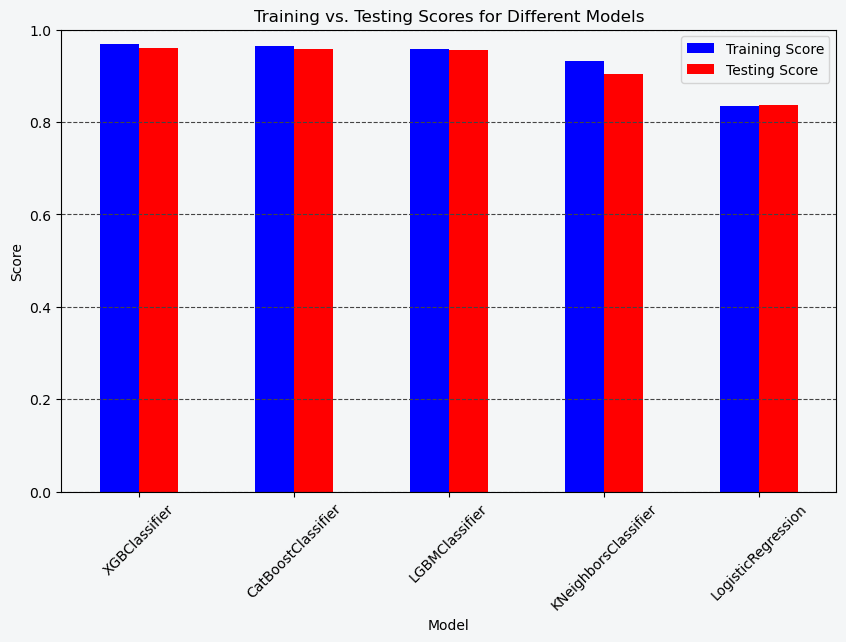

In [81]:
results = {
    'Model': [
        'CatBoostClassifier', 
        'XGBClassifier', 
        'LGBMClassifier', 
        'KNeighborsClassifier', 
        'LogisticRegression'
    ],
    'Training Score': [
        catboost.score(feature_train, target_train), 
        xgb.score(feature_train, target_train),
        lgbm.score(feature_train, target_train), 
        KNN.score(feature_train, target_train), 
        LR.score(feature_train, target_train), 
    ],
    'Testing Score': [
        catboost.score(feature_test, target_test), 
        xgb.score(feature_test, target_test),
        lgbm.score(feature_test, target_test), 
        KNN.score(feature_test, target_test), 
        LR.score(feature_test, target_test), 
    ]
}
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Testing Score', ascending=False)
print("\nComparison of Models' Training and Testing Scores:")
print(results_df)

results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='bwr', rot=45)
plt.title('Training vs. Testing Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(['Training Score', 'Testing Score'])
plt.grid(axis='y', linestyle='--')
plt.show()

### Confusion Matrices of Different Models

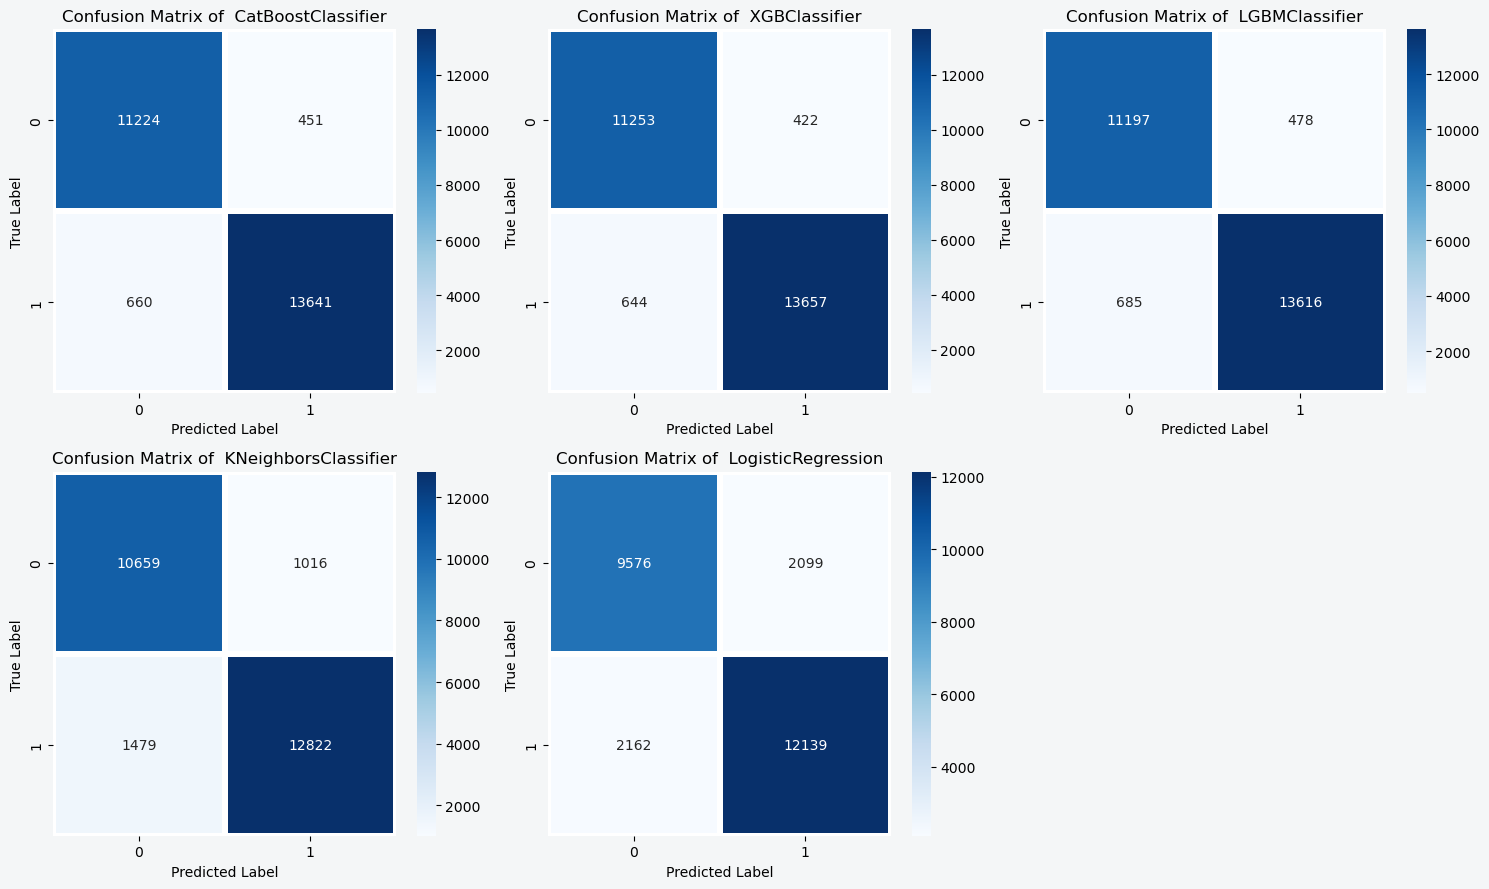

In [83]:
models_predictions=[target_pred_catboost,target_pred_xgb,target_pred_lgbm,target_pred_KNN,target_pred_LR]
labels=['CatBoostClassifier','XGBClassifier','LGBMClassifier','KNeighborsClassifier','LogisticRegression']
plt.figure(figsize=(15,9))
for n,model in enumerate(models_predictions) :
    cm = confusion_matrix(target_test,model)
    plt.subplot(2,3,n+1)
    sns.heatmap(cm,annot=True,fmt='d',linewidths=3,cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix of  '+ labels[n])
    plt.tight_layout()

### Comparison of Different Metrics for Different Models'

<!-- **Definition**\
<span style="font-size:12px; color:blue">The Precision-Recall Curve evaluates the trade-off between precision and recall for different thresholds for each classifier.</span>\
<span style="font-size:12px; color:blue">- Precision: The proportion of positive predictions that are actually correct (True Positives / (True Positives + False Positives)).</span>\
<span style="font-size:12px; color:blue">- Recall: The proportion of actual positives correctly identified (True Positives / (True Positives + False Negatives)).</span>

**Observation**\
<span style="font-size:12px; color:blue">- CatBoostClassifier, XGBoostClassifier, and LGBMClassifier maintain high precision and recall, making them ideal for scenarios where both metrics are critical.</span>\<span style="font-size:12px; color:blue">- KNeighborsClassifier and LogisticRegression exhibit weaker performance, particularly when attempting to maximize recall, as their precision degrades significantly.</span> -->


Comparison of Models' Metrics:
                  Model  Precision  Recall  F1-Score  Accuracy
1         XGBClassifier     0.9592  0.9590    0.9590    0.9590
0    CatBoostClassifier     0.9574  0.9572    0.9573    0.9572
2        LGBMClassifier     0.9554  0.9552    0.9553    0.9552
3  KNeighborsClassifier     0.9048  0.9039    0.9041    0.9039
4    LogisticRegression     0.8361  0.8360    0.8360    0.8360


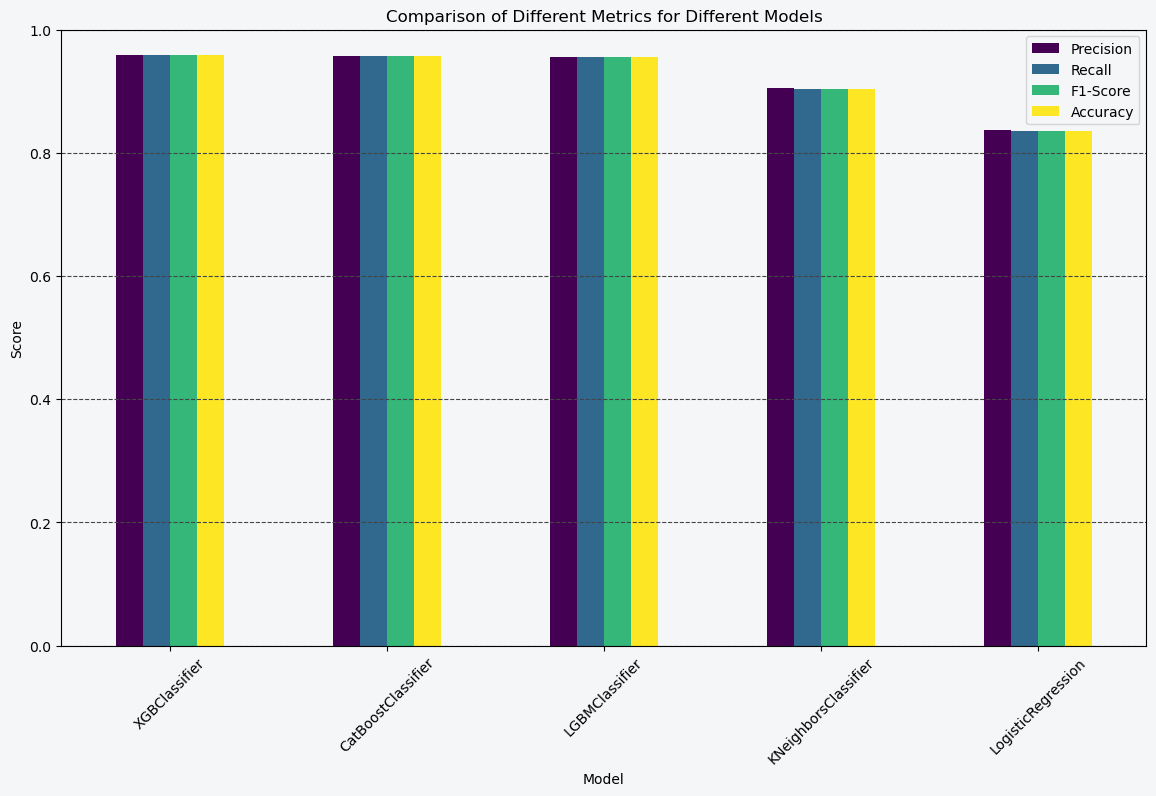

In [85]:
summary_results = []
for model_name, model_pred in zip(labels, models_predictions):
    report = classification_report(target_test, model_pred, output_dict=True)
    precision = round(report['weighted avg']['precision'], 4)
    recall = round(report['weighted avg']['recall'], 4)
    f1_score = round(report['weighted avg']['f1-score'], 4)
    accuracy = round(accuracy_score(target_test, model_pred), 4)
    summary_results.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'Accuracy': accuracy
    })
metrics_df = pd.DataFrame(summary_results)
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

print("\nComparison of Models' Metrics:")
print(metrics_df)

metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(14, 8), ylim=(0, 1), colormap='viridis', rot=45)
plt.title('Comparison of Different Metrics for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(['Precision', 'Recall', 'F1-Score', 'Accuracy'])
plt.grid(axis='y', linestyle='--')
plt.show()

### ROC Curves for Different Models

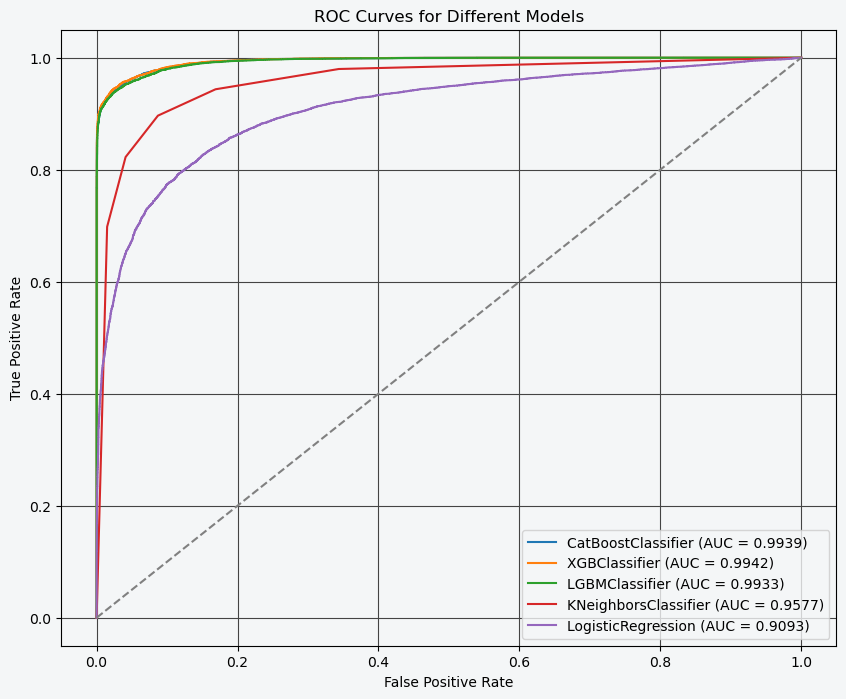

In [87]:
models = [catboost, xgb, lgbm, KNN, LR]
model_preds_proba = []

for model in models:
    if hasattr(model, "predict_proba"):
        model_preds_proba.append(model.predict_proba(feature_test)[:, 1])
    elif hasattr(model, "decision_function"):
        model_preds_proba.append(model.decision_function(feature_test))
    else:
        print(f"Model {model} does not support probability prediction.")

plt.figure(figsize=(10, 8))

for i, model_name in enumerate(labels):
    fpr, tpr, _ = roc_curve(target_test, model_preds_proba[i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()